In [1]:
# from train_autoencoder import *
import numpy as np
import matplotlib.pyplot as plt
from mpcontribs.client import Client

from mp_api.client import MPRester
import csv
from h5 import *
from scipy.interpolate import RegularGridInterpolator, LinearNDInterpolator
from tqdm import tqdm

/home/egorcaa/miniconda3/envs/triqs/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


No module named 'phonopy'
No module named 'phonopy'


In [2]:
apikey = 'SFTntPIf0QnTef7f6sZKkBSwGILrxlXZ'
client = Client(apikey=apikey, project="2dmatpedia")


In [3]:
# query = {"formula__contains": "Fe"}
fields = ["identifier", "formula"]
D2matdata = client.query_contributions(
    query=[], fields=fields, paginate=True
)

Totals: 100%|##########| 50/50 [00:05<00:00,  9.76it/s]


In [9]:
with open('2D_materials.csv','w') as write_file:
    data_wr = csv.writer(write_file)
    for  row in D2matdata['data']:
        data_wr.writerow(row.values())


In [4]:
D2matdata = np.genfromtxt('2D_materials.csv', delimiter=',')
D2matdata

array([[nan, nan],
       [nan, nan],
       [nan, nan],
       ...,
       [nan, nan],
       [nan, nan],
       [nan, nan]])

In [5]:
band_structs = []
max_limit = 1000
with MPRester(api_key=apikey) as mpr:
    for item in tqdm(D2matdata['data'][:max_limit]):
        mat_id = item['identifier']
        material = item['formula']

        try:
            bandstructure = mpr.get_bandstructure_by_material_id(mat_id, line_mode=False)
            kpt = np.array([kpt.frac_coords for kpt in bandstructure.kpoints ])
            dim1 = np.unique(kpt[:,0])
            dim2 = np.unique(kpt[:,1])
            dim3 = np.unique(kpt[:,2])
            z0 = np.min(np.abs(dim3))
            
            # print(len(dim1), dim1 )
            # print(len(dim2), dim2 )
            # print(len(dim3), dim3 )
            # print(np.array(list(bandstructure.bands.values()))[0].shape)
            for z in dim3:
                if  len(kpt[kpt[:, 2] == z]) == len(dim1)*len(dim2) :
                # if len(dim1) == len(dim2) :
                    band_structs.append(
                        [ (len(dim1), len(dim2)), len(dim3), kpt[kpt[:, 2] == z, :2], 
                        np.array(list(bandstructure.bands.values()))[0][:, kpt[:, 2] == z] ]
                    )
                    print(material, mat_id)

        except Exception as e:
            print(f"Error retrieving band structure for {mat_id}: {e}")
    

  0%|          | 2/1000 [00:02<21:24,  1.29s/it]

As2O3 mp-1582
As2O3 mp-1582
As2O3 mp-1582
As2O3 mp-1582
As2O3 mp-1582


  0%|          | 5/1000 [00:05<18:01,  1.09s/it]

PtI2 mp-28319
PtI2 mp-28319
PtI2 mp-28319


  1%|          | 7/1000 [00:07<17:49,  1.08s/it]

SiP2 mp-9996
SiP2 mp-9996
SiP2 mp-9996


  1%|          | 10/1000 [00:15<38:53,  2.36s/it]

CuF2 mp-1229
CuF2 mp-1229
CuF2 mp-1229
CuF2 mp-1229
CuF2 mp-1229
CuF2 mp-1229


  1%|▏         | 14/1000 [00:19<22:15,  1.35s/it]

V2O5 mp-776041
V2O5 mp-776041


  2%|▏         | 16/1000 [00:24<32:33,  1.99s/it]

TaS3 mp-30527
TaS3 mp-30527


  2%|▏         | 23/1000 [00:32<22:44,  1.40s/it]

Sn3Pd mp-1371
Sn3Pd mp-1371
Sn3Pd mp-1371
Sn3Pd mp-1371


  2%|▏         | 24/1000 [00:33<21:54,  1.35s/it]

NbI5 mp-569578
NbI5 mp-569578
NbI5 mp-569578


  2%|▎         | 25/1000 [00:34<21:06,  1.30s/it]

SbI3 mp-569224
SbI3 mp-569224
SbI3 mp-569224


  3%|▎         | 26/1000 [00:34<16:09,  1.00it/s]

Error retrieving band structure for mp-32580: No uniform band structure data found for mp-32580


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
  3%|▎         | 27/1000 [00:35<13:57,  1.16it/s]

Error retrieving band structure for mvc-6083: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
  3%|▎         | 28/1000 [00:35<11:01,  1.47it/s]

Error retrieving band structure for mvc-6083: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
  3%|▎         | 29/1000 [00:36<10:42,  1.51it/s]

Error retrieving band structure for mvc-13985: No electronic structure data found.


  3%|▎         | 30/1000 [00:37<13:47,  1.17it/s]

TiS2 mp-1008682
TiS2 mp-1008682
TiS2 mp-1008682
TiS2 mp-1008682
TiS2 mp-1008682
TiS2 mp-1008682


  3%|▎         | 31/1000 [00:38<12:34,  1.28it/s]

AlF3 mp-635425
AlF3 mp-635425


  3%|▎         | 32/1000 [00:40<21:18,  1.32s/it]

LiBe mp-1001825
LiBe mp-1001825
LiBe mp-1001825
LiBe mp-1001825
LiBe mp-1001825
LiBe mp-1001825
LiBe mp-1001825
LiBe mp-1001825
LiBe mp-1001825


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 12157.40it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
  4%|▎         | 36/1000 [00:44<16:16,  1.01s/it]

Error retrieving band structure for mp-705538: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 19239.93it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
  4%|▍         | 41/1000 [00:50<17:15,  1.08s/it]

Error retrieving band structure for mvc-5485: No electronic structure data found.


  4%|▍         | 42/1000 [00:51<16:02,  1.00s/it]

Error retrieving band structure for mp-684652: No uniform band structure data found for mp-684652


  4%|▍         | 43/1000 [00:52<15:12,  1.05it/s]

Error retrieving band structure for mp-978259: No uniform band structure data found for mp-978259


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
  4%|▍         | 44/1000 [00:52<13:14,  1.20it/s]

Error retrieving band structure for mp-1077196: No electronic structure data found.


  5%|▍         | 46/1000 [00:54<15:24,  1.03it/s]

B13P2 mp-13862
B13P2 mp-13862
B13P2 mp-13862
B13P2 mp-13862


  5%|▍         | 48/1000 [00:58<23:07,  1.46s/it]

TaAlO4 mp-14333
TaAlO4 mp-14333
TaAlO4 mp-14333
TaAlO4 mp-14333


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 15307.68it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
  5%|▌         | 50/1000 [00:59<17:16,  1.09s/it]

Error retrieving band structure for mp-1078861: No electronic structure data found.


  5%|▌         | 51/1000 [01:00<15:03,  1.05it/s]

Error retrieving band structure for mp-1096811: No uniform band structure data found for mp-1096811


  5%|▌         | 53/1000 [01:02<15:31,  1.02it/s]

TiSCl mp-1013900
TiSCl mp-1013900
TiSCl mp-1013900


  5%|▌         | 54/1000 [01:05<23:00,  1.46s/it]

CuF2 mp-1229
CuF2 mp-1229
CuF2 mp-1229
CuF2 mp-1229
CuF2 mp-1229
CuF2 mp-1229


  6%|▌         | 55/1000 [01:05<18:53,  1.20s/it]

PdCl2 mp-1018891
PdCl2 mp-1018891
PdCl2 mp-1018891
PdCl2 mp-1018891
PdCl2 mp-1018891


  6%|▌         | 58/1000 [01:08<16:00,  1.02s/it]

Sb2S3 mp-2809
Sb2S3 mp-2809
Sb2S3 mp-2809


  6%|▌         | 59/1000 [01:11<25:23,  1.62s/it]

NaMnAs mp-20612
NaMnAs mp-20612
NaMnAs mp-20612


  6%|▋         | 64/1000 [01:16<16:40,  1.07s/it]

Te2O3F2 mp-29185
Te2O3F2 mp-29185
Te2O3F2 mp-29185
Te2O3F2 mp-29185


  6%|▋         | 65/1000 [01:17<14:08,  1.10it/s]

TaCoTe2 mp-28846
TaCoTe2 mp-28846
TaCoTe2 mp-28846
TaCoTe2 mp-28846


  7%|▋         | 66/1000 [01:18<13:27,  1.16it/s]

SrThBr6 mp-29016
SrThBr6 mp-29016
SrThBr6 mp-29016


  7%|▋         | 67/1000 [01:19<15:07,  1.03it/s]

ZrSe3 mp-1683
ZrSe3 mp-1683


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
  7%|▋         | 68/1000 [01:19<13:26,  1.16it/s]

Error retrieving band structure for mp-565201: No electronic structure data found.


  7%|▋         | 69/1000 [01:20<13:16,  1.17it/s]

BaCaI4 mp-766348
BaCaI4 mp-766348
BaCaI4 mp-766348


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
  7%|▋         | 70/1000 [01:21<11:36,  1.33it/s]

Error retrieving band structure for mvc-7248: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 10155.70it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
  7%|▋         | 72/1000 [01:22<09:45,  1.58it/s]

Error retrieving band structure for mp-765923: No electronic structure data found.


  7%|▋         | 74/1000 [01:25<17:59,  1.17s/it]

AgTeO3 mp-561489
AgTeO3 mp-561489
AgTeO3 mp-561489
AgTeO3 mp-561489


  8%|▊         | 76/1000 [01:27<18:56,  1.23s/it]

Te2Pd3Pb2 mp-605028
Te2Pd3Pb2 mp-605028


  8%|▊         | 77/1000 [01:28<14:40,  1.05it/s]

Error retrieving band structure for mp-866917: No uniform band structure data found for mp-866917


  8%|▊         | 78/1000 [01:28<13:05,  1.17it/s]

Error retrieving band structure for mp-859136: No uniform band structure data found for mp-859136


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
  8%|▊         | 79/1000 [01:29<11:57,  1.28it/s]

Error retrieving band structure for mvc-13534: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
  8%|▊         | 80/1000 [01:30<11:38,  1.32it/s]

Error retrieving band structure for mp-998512: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
  8%|▊         | 81/1000 [01:30<10:58,  1.40it/s]

Error retrieving band structure for mp-566299: No electronic structure data found.


  8%|▊         | 84/1000 [01:34<16:31,  1.08s/it]

ScBrO mp-546279
ScBrO mp-546279
ScBrO mp-546279
ScBrO mp-546279


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 21183.35it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
  9%|▊         | 86/1000 [01:36<14:52,  1.02it/s]

Error retrieving band structure for mp-561475: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
  9%|▊         | 87/1000 [01:37<13:12,  1.15it/s]

Error retrieving band structure for mp-998560: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
  9%|▉         | 88/1000 [01:37<10:38,  1.43it/s]

Error retrieving band structure for mp-765936: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
  9%|▉         | 89/1000 [01:38<10:42,  1.42it/s]

Error retrieving band structure for mvc-8367: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 18236.10it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
  9%|▉         | 92/1000 [01:41<13:42,  1.10it/s]

Error retrieving band structure for mvc-6055: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
  9%|▉         | 93/1000 [01:42<10:58,  1.38it/s]

Error retrieving band structure for mp-775076: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
  9%|▉         | 94/1000 [01:42<09:03,  1.67it/s]

Error retrieving band structure for mvc-14216: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 10%|▉         | 95/1000 [01:43<09:07,  1.65it/s]

Error retrieving band structure for mp-767158: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 10%|▉         | 96/1000 [01:43<07:45,  1.94it/s]

Error retrieving band structure for mvc-1220: No electronic structure data found.


 10%|▉         | 97/1000 [01:45<12:15,  1.23it/s]

InS mp-630528
InS mp-630528
InS mp-630528
InS mp-630528


 10%|▉         | 98/1000 [01:49<27:19,  1.82s/it]

AgClO2 mp-675942
AgClO2 mp-675942
AgClO2 mp-675942
AgClO2 mp-675942
AgClO2 mp-675942
AgClO2 mp-675942


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 10%|▉         | 99/1000 [01:49<21:42,  1.45s/it]

Error retrieving band structure for mvc-5722: No electronic structure data found.


 10%|█         | 101/1000 [01:51<15:59,  1.07s/it]

Ta2I5 mp-32554
Ta2I5 mp-32554
Ta2I5 mp-32554


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 12557.80it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 10%|█         | 103/1000 [01:52<13:02,  1.15it/s]

Error retrieving band structure for mp-25775: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 11459.85it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 10%|█         | 105/1000 [01:54<11:34,  1.29it/s]

Error retrieving band structure for mp-765934: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 11%|█         | 106/1000 [01:54<09:09,  1.63it/s]

Error retrieving band structure for mp-849227: No electronic structure data found.


 11%|█         | 107/1000 [01:56<17:50,  1.20s/it]

Sc6C2I11 mp-541102


 11%|█         | 109/1000 [01:58<13:51,  1.07it/s]

BiOF mp-759750
BiOF mp-759750
BiOF mp-759750


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 11%|█         | 110/1000 [01:58<12:24,  1.20it/s]

Error retrieving band structure for mvc-10249: No electronic structure data found.


 11%|█         | 111/1000 [02:04<33:35,  2.27s/it]

CeP3H8O7 mp-505610
CeP3H8O7 mp-505610


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 11%|█         | 112/1000 [02:04<25:42,  1.74s/it]

Error retrieving band structure for mvc-6392: No electronic structure data found.


 12%|█▏        | 115/1000 [02:07<17:37,  1.20s/it]

Error retrieving band structure for mp-1038761: No uniform band structure data found for mp-1038761


 12%|█▏        | 117/1000 [02:09<16:17,  1.11s/it]

RbC2 mp-1077369
RbC2 mp-1077369
RbC2 mp-1077369


 12%|█▏        | 120/1000 [02:12<15:49,  1.08s/it]

TePt mp-11693
TePt mp-11693
TePt mp-11693
TePt mp-11693
TePt mp-11693


 12%|█▏        | 121/1000 [02:13<15:02,  1.03s/it]

SiS mp-1023900
SiS mp-1023900
SiS mp-1023900


 12%|█▏        | 123/1000 [02:14<10:45,  1.36it/s]

Error retrieving band structure for mp-1039088: No uniform band structure data found for mp-1039088


 12%|█▏        | 124/1000 [02:15<12:52,  1.13it/s]

Sr2Cu2O3 mp-8806
Sr2Cu2O3 mp-8806
Sr2Cu2O3 mp-8806
Sr2Cu2O3 mp-8806


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 12052.60it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 13%|█▎        | 126/1000 [02:17<10:45,  1.35it/s]

Error retrieving band structure for mvc-572: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 20360.70it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 13%|█▎        | 128/1000 [02:18<09:42,  1.50it/s]

Error retrieving band structure for mvc-1355: No electronic structure data found.


 13%|█▎        | 133/1000 [02:22<13:33,  1.07it/s]

LuPb2 mp-11493
LuPb2 mp-11493
LuPb2 mp-11493
LuPb2 mp-11493
LuPb2 mp-11493


 13%|█▎        | 134/1000 [02:23<13:24,  1.08it/s]

TlF mp-720
TlF mp-720
TlF mp-720
TlF mp-720
TlF mp-720
TlF mp-720


 14%|█▎        | 136/1000 [02:26<17:14,  1.20s/it]

Sn4Pt mp-20662
Sn4Pt mp-20662
Sn4Pt mp-20662


 14%|█▎        | 137/1000 [02:26<13:32,  1.06it/s]

Error retrieving band structure for mp-28500: No uniform band structure data found for mp-28500


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 15477.14it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 14%|█▍        | 139/1000 [02:28<12:18,  1.17it/s]

Error retrieving band structure for mp-31053: No electronic structure data found.


 14%|█▍        | 141/1000 [02:33<26:14,  1.83s/it]

ZrGe2 mp-2430
ZrGe2 mp-2430
ZrGe2 mp-2430
ZrGe2 mp-2430


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 14%|█▍        | 142/1000 [02:34<20:50,  1.46s/it]

Error retrieving band structure for mp-765332: No electronic structure data found.


 14%|█▍        | 143/1000 [02:37<26:31,  1.86s/it]

Bi9I2 mp-28149
Bi9I2 mp-28149


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 12748.64it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 14%|█▍        | 145/1000 [02:39<19:02,  1.34s/it]

Error retrieving band structure for mvc-13941: No electronic structure data found.


 15%|█▍        | 146/1000 [02:41<22:36,  1.59s/it]

Sn4Pt mp-20662
Sn4Pt mp-20662
Sn4Pt mp-20662


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 15%|█▍        | 147/1000 [02:41<18:18,  1.29s/it]

Error retrieving band structure for mp-1863: No electronic structure data found.


 15%|█▍        | 148/1000 [02:42<17:47,  1.25s/it]

Ta2Se mp-8732
Ta2Se mp-8732


 15%|█▌        | 150/1000 [02:44<14:13,  1.00s/it]

Error retrieving band structure for mp-850083: No uniform band structure data found for mp-850083


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 15%|█▌        | 151/1000 [02:45<12:31,  1.13it/s]

Error retrieving band structure for mp-765268: No electronic structure data found.


 15%|█▌        | 153/1000 [02:47<12:39,  1.11it/s]

Error retrieving band structure for mp-556225: No uniform band structure data found for mp-556225


 15%|█▌        | 154/1000 [02:48<15:46,  1.12s/it]

Bi9I2 mp-28149
Bi9I2 mp-28149


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 19878.22it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 16%|█▌        | 156/1000 [02:50<12:17,  1.15it/s]

Error retrieving band structure for mp-765939: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 12336.19it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 16%|█▌        | 160/1000 [02:54<13:20,  1.05it/s]

Error retrieving band structure for mp-765923: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 16%|█▌        | 161/1000 [02:54<11:29,  1.22it/s]

Error retrieving band structure for mvc-14047: No electronic structure data found.


 16%|█▌        | 162/1000 [02:55<11:47,  1.18it/s]

La2I5 mp-30282
La2I5 mp-30282


 16%|█▋        | 164/1000 [02:56<09:52,  1.41it/s]

Error retrieving band structure for mp-978259: No uniform band structure data found for mp-978259


 16%|█▋        | 165/1000 [02:57<09:28,  1.47it/s]

Error retrieving band structure for mp-684654: No uniform band structure data found for mp-684654


 17%|█▋        | 167/1000 [02:59<12:02,  1.15it/s]

YS mp-22562
YS mp-22562
YS mp-22562
YS mp-22562


 17%|█▋        | 170/1000 [03:02<11:56,  1.16it/s]

Error retrieving band structure for mp-32580: No uniform band structure data found for mp-32580


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 17%|█▋        | 171/1000 [03:03<10:51,  1.27it/s]

Error retrieving band structure for mvc-11234: No electronic structure data found.


 17%|█▋        | 173/1000 [03:04<10:25,  1.32it/s]

BiBr3 mp-752602
BiBr3 mp-752602
BiBr3 mp-752602


 17%|█▋        | 174/1000 [03:05<12:41,  1.09it/s]

Al2O3 mp-638765
Al2O3 mp-638765
Al2O3 mp-638765


 18%|█▊        | 175/1000 [03:06<10:55,  1.26it/s]

Error retrieving band structure for mp-978259: No uniform band structure data found for mp-978259


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 19418.07it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 18%|█▊        | 177/1000 [03:07<09:11,  1.49it/s]

Error retrieving band structure for mvc-15907: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 18%|█▊        | 178/1000 [03:07<07:41,  1.78it/s]

Error retrieving band structure for mp-561779: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 18%|█▊        | 179/1000 [03:08<06:38,  2.06it/s]

Error retrieving band structure for mvc-13836: No electronic structure data found.


 18%|█▊        | 180/1000 [03:08<05:56,  2.30it/s]

Error retrieving band structure for mp-684652: No uniform band structure data found for mp-684652


 18%|█▊        | 181/1000 [03:09<08:32,  1.60it/s]

TbTe3 mp-1084847
TbTe3 mp-1084847
TbTe3 mp-1084847
TbTe3 mp-1084847
TbTe3 mp-1084847
TbTe3 mp-1084847
TbTe3 mp-1084847


 18%|█▊        | 182/1000 [03:11<15:40,  1.15s/it]

Ag2IO6 mp-1079032
Ag2IO6 mp-1079032
Ag2IO6 mp-1079032
Ag2IO6 mp-1079032


 18%|█▊        | 184/1000 [03:13<13:34,  1.00it/s]

Error retrieving band structure for mp-1039263: No uniform band structure data found for mp-1039263


 19%|█▊        | 186/1000 [03:15<11:44,  1.16it/s]

Fe(SbS2)2 mp-20767
Fe(SbS2)2 mp-20767
Fe(SbS2)2 mp-20767
Fe(SbS2)2 mp-20767


 19%|█▉        | 188/1000 [03:17<11:46,  1.15it/s]

GeS mp-2242
GeS mp-2242
GeS mp-2242


 19%|█▉        | 189/1000 [03:17<10:16,  1.32it/s]

Error retrieving band structure for mp-28691: No uniform band structure data found for mp-28691


 19%|█▉        | 193/1000 [03:23<17:53,  1.33s/it]

NaTaCl6 mp-28179


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 15420.24it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 20%|█▉        | 195/1000 [03:24<12:18,  1.09it/s]

Error retrieving band structure for mvc-353: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 18001.30it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 20%|█▉        | 197/1000 [03:25<10:43,  1.25it/s]

Error retrieving band structure for mvc-10741: No electronic structure data found.


 20%|█▉        | 198/1000 [03:27<15:03,  1.13s/it]

SbAsO3 mp-28109
SbAsO3 mp-28109
SbAsO3 mp-28109
SbAsO3 mp-28109
SbAsO3 mp-28109


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 20%|█▉        | 199/1000 [03:27<12:00,  1.11it/s]

Error retrieving band structure for mp-704848: No electronic structure data found.


 20%|██        | 200/1000 [03:31<21:36,  1.62s/it]

Sm(AlCl4)2 mp-569569
Sm(AlCl4)2 mp-569569


 20%|██        | 201/1000 [03:32<18:23,  1.38s/it]

CdP2H6O7 mp-24407
CdP2H6O7 mp-24407
CdP2H6O7 mp-24407


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 18078.90it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 20%|██        | 204/1000 [03:36<17:42,  1.33s/it]

Error retrieving band structure for mvc-8648: No electronic structure data found.


 20%|██        | 205/1000 [03:36<15:14,  1.15s/it]

LiTeO3 mp-755231
LiTeO3 mp-755231
LiTeO3 mp-755231
LiTeO3 mp-755231
LiTeO3 mp-755231


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 21%|██        | 206/1000 [03:37<13:29,  1.02s/it]

Error retrieving band structure for mvc-8117: No electronic structure data found.


 21%|██        | 207/1000 [03:38<11:53,  1.11it/s]

Error retrieving band structure for mp-683998: No uniform band structure data found for mp-683998


 21%|██        | 208/1000 [03:42<24:02,  1.82s/it]

Cu(IO3)2 mp-556582
Cu(IO3)2 mp-556582
Cu(IO3)2 mp-556582


 21%|██        | 209/1000 [03:43<21:10,  1.61s/it]

CuO2F mp-997044
CuO2F mp-997044
CuO2F mp-997044
CuO2F mp-997044
CuO2F mp-997044


 21%|██        | 211/1000 [03:45<15:49,  1.20s/it]

AgClO2 mp-997013
AgClO2 mp-997013
AgClO2 mp-997013


 21%|██        | 212/1000 [03:49<29:18,  2.23s/it]

CaH6C2O7 mp-559469
CaH6C2O7 mp-559469
CaH6C2O7 mp-559469


 21%|██▏       | 213/1000 [03:53<34:49,  2.66s/it]

FeTeBr7 mp-540998
FeTeBr7 mp-540998


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 21%|██▏       | 214/1000 [03:53<26:41,  2.04s/it]

Error retrieving band structure for mp-32324: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 22%|██▏       | 215/1000 [03:54<21:54,  1.67s/it]

Error retrieving band structure for mp-764204: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 22%|██▏       | 216/1000 [03:55<17:22,  1.33s/it]

Error retrieving band structure for mvc-10495: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 22%|██▏       | 217/1000 [03:55<14:27,  1.11s/it]

Error retrieving band structure for mvc-4767: No electronic structure data found.


 22%|██▏       | 220/1000 [03:59<17:32,  1.35s/it]

YbH2ClO2 mp-979964
YbH2ClO2 mp-979964
YbH2ClO2 mp-979964
YbH2ClO2 mp-979964


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 21399.51it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 22%|██▏       | 223/1000 [04:01<10:45,  1.20it/s]

Error retrieving band structure for mvc-11097: No electronic structure data found.


 22%|██▏       | 224/1000 [04:02<11:07,  1.16it/s]

InTeClO3 mp-557992
InTeClO3 mp-557992
InTeClO3 mp-557992


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 17924.38it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 23%|██▎       | 226/1000 [04:05<14:39,  1.14s/it]

Error retrieving band structure for mvc-10548: No electronic structure data found.


 23%|██▎       | 227/1000 [04:06<12:48,  1.01it/s]

Al2FeS4 mp-1078015
Al2FeS4 mp-1078015


 23%|██▎       | 229/1000 [04:07<10:05,  1.27it/s]

Error retrieving band structure for mp-675589: No uniform band structure data found for mp-675589


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 23%|██▎       | 230/1000 [04:08<08:13,  1.56it/s]

Error retrieving band structure for mvc-3402: No electronic structure data found.


 23%|██▎       | 232/1000 [04:11<15:48,  1.24s/it]

Ag3SI mp-676121
Ag3SI mp-676121


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 12633.45it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 23%|██▎       | 234/1000 [04:14<15:26,  1.21s/it]

Error retrieving band structure for mvc-3393: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 24%|██▎       | 235/1000 [04:14<13:07,  1.03s/it]

Error retrieving band structure for mp-776827: No electronic structure data found.


 24%|██▎       | 236/1000 [04:15<11:56,  1.07it/s]

Error retrieving band structure for mp-28571: No uniform band structure data found for mp-28571


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 12087.33it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 24%|██▍       | 238/1000 [04:16<09:30,  1.34it/s]

Error retrieving band structure for mp-705053: No electronic structure data found.


 24%|██▍       | 240/1000 [04:21<20:23,  1.61s/it]

CuB2(PbO3)2 mp-554812
CuB2(PbO3)2 mp-554812
CuB2(PbO3)2 mp-554812


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 18558.87it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 24%|██▍       | 242/1000 [04:22<13:26,  1.06s/it]

Error retrieving band structure for mp-763499: No electronic structure data found.


 24%|██▍       | 244/1000 [04:23<11:17,  1.12it/s]

Error retrieving band structure for mp-1038761: No uniform band structure data found for mp-1038761


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 24%|██▍       | 245/1000 [04:24<09:01,  1.39it/s]

Error retrieving band structure for mp-1066821: No electronic structure data found.


 25%|██▍       | 246/1000 [04:24<09:03,  1.39it/s]

NaH4ClO2 mp-504600
NaH4ClO2 mp-504600
NaH4ClO2 mp-504600
NaH4ClO2 mp-504600
NaH4ClO2 mp-504600


 25%|██▌       | 250/1000 [04:28<10:35,  1.18it/s]

Error retrieving band structure for mp-1074652: No uniform band structure data found for mp-1074652


 25%|██▌       | 251/1000 [04:29<09:42,  1.29it/s]

Error retrieving band structure for mp-1038761: No uniform band structure data found for mp-1038761


 25%|██▌       | 252/1000 [04:29<10:14,  1.22it/s]

Error retrieving band structure for mp-1071032: No uniform band structure data found for mp-1071032


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 15363.75it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 26%|██▌       | 255/1000 [04:31<08:44,  1.42it/s]

Error retrieving band structure for mvc-14464: No electronic structure data found.


 26%|██▌       | 258/1000 [04:34<11:19,  1.09it/s]

Sn4Ir mp-1080586
Sn4Ir mp-1080586
Sn4Ir mp-1080586


 26%|██▌       | 259/1000 [04:37<16:21,  1.32s/it]

Ca5Ir mp-570356
Ca5Ir mp-570356
Ca5Ir mp-570356
Ca5Ir mp-570356


 26%|██▋       | 264/1000 [04:43<15:58,  1.30s/it]

PbO mp-20878
PbO mp-20878
PbO mp-20878
PbO mp-20878
PbO mp-20878
PbO mp-20878


 27%|██▋       | 267/1000 [04:46<12:37,  1.03s/it]

TeI mp-23273
TeI mp-23273


 27%|██▋       | 271/1000 [04:52<21:11,  1.74s/it]

NbS3 mp-562100
NbS3 mp-562100
NbS3 mp-562100


 27%|██▋       | 273/1000 [04:55<19:42,  1.63s/it]

Bi9I2 mp-28149
Bi9I2 mp-28149


 27%|██▋       | 274/1000 [04:58<25:17,  2.09s/it]

Al2O3 mp-755066
Al2O3 mp-755066
Al2O3 mp-755066
Al2O3 mp-755066
Al2O3 mp-755066
Al2O3 mp-755066


 28%|██▊       | 275/1000 [05:00<26:44,  2.21s/it]

Pr2I5 mp-22854
Pr2I5 mp-22854


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 28%|██▊       | 276/1000 [05:01<20:33,  1.70s/it]

Error retrieving band structure for mvc-14047: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 28%|██▊       | 277/1000 [05:01<15:28,  1.28s/it]

Error retrieving band structure for mp-1863: No electronic structure data found.


 28%|██▊       | 279/1000 [05:03<14:46,  1.23s/it]

Sb2S3 mp-2809
Sb2S3 mp-2809
Sb2S3 mp-2809


 28%|██▊       | 282/1000 [05:06<13:01,  1.09s/it]

TeI mp-569766
TeI mp-569766


 28%|██▊       | 285/1000 [05:10<15:11,  1.27s/it]

PbS mp-1078500
PbS mp-1078500
PbS mp-1078500


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 29%|██▊       | 286/1000 [05:11<13:11,  1.11s/it]

Error retrieving band structure for mp-775847: No electronic structure data found.


 29%|██▊       | 287/1000 [05:12<12:08,  1.02s/it]

TlP5 mp-27411
TlP5 mp-27411
TlP5 mp-27411


 29%|██▉       | 289/1000 [05:13<08:33,  1.38it/s]

Error retrieving band structure for mp-850083: No uniform band structure data found for mp-850083


 29%|██▉       | 292/1000 [05:23<32:44,  2.78s/it]

Error retrieving band structure for mp-684898: 'utf-8' codec can't decode byte 0x8b in position 1: invalid start byte


 29%|██▉       | 294/1000 [05:24<19:13,  1.63s/it]

TlP5 mp-27411
TlP5 mp-27411
TlP5 mp-27411


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 30%|██▉       | 295/1000 [05:25<15:31,  1.32s/it]

Error retrieving band structure for mp-765332: No electronic structure data found.


 30%|██▉       | 296/1000 [05:25<12:39,  1.08s/it]

TlP5 mp-27411
TlP5 mp-27411
TlP5 mp-27411


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 30%|██▉       | 297/1000 [05:26<11:00,  1.06it/s]

Error retrieving band structure for mp-765332: No electronic structure data found.


 30%|██▉       | 299/1000 [05:29<13:16,  1.14s/it]

Bi2Pt mp-569581
Bi2Pt mp-569581
Bi2Pt mp-569581
Bi2Pt mp-569581


 30%|███       | 303/1000 [05:33<11:30,  1.01it/s]

Error retrieving band structure for mp-542495: No uniform band structure data found for mp-542495


 31%|███       | 307/1000 [05:36<09:47,  1.18it/s]

BiBr3 mp-752602
BiBr3 mp-752602
BiBr3 mp-752602


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 31%|███       | 308/1000 [05:36<08:58,  1.29it/s]

Error retrieving band structure for mvc-5746: No electronic structure data found.


 31%|███       | 310/1000 [05:40<13:45,  1.20s/it]

GeTe mp-628781
GeTe mp-628781
GeTe mp-628781
GeTe mp-628781
GeTe mp-628781


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 12122.27it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 31%|███       | 312/1000 [05:42<11:11,  1.02it/s]

Error retrieving band structure for mp-705538: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 31%|███▏      | 313/1000 [05:42<09:56,  1.15it/s]

Error retrieving band structure for mvc-13985: No electronic structure data found.


 32%|███▏      | 317/1000 [05:45<08:41,  1.31it/s]

Al2S3 mp-699208


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 32%|███▏      | 318/1000 [05:46<08:09,  1.39it/s]

Error retrieving band structure for mvc-15907: No electronic structure data found.


 32%|███▏      | 320/1000 [05:48<11:00,  1.03it/s]

Al2S3 mp-699208


 32%|███▏      | 321/1000 [05:49<09:56,  1.14it/s]

Error retrieving band structure for mp-1038761: No uniform band structure data found for mp-1038761


 32%|███▏      | 323/1000 [05:51<11:22,  1.01s/it]

TePb mp-1079574
TePb mp-1079574
TePb mp-1079574


 32%|███▎      | 325/1000 [05:54<14:11,  1.26s/it]

Bi2Pt mp-1078313
Bi2Pt mp-1078313
Bi2Pt mp-1078313


 33%|███▎      | 328/1000 [05:57<13:02,  1.16s/it]

CuPb2(ClO2)2 mp-1079292
CuPb2(ClO2)2 mp-1079292
CuPb2(ClO2)2 mp-1079292
CuPb2(ClO2)2 mp-1079292


 33%|███▎      | 330/1000 [05:59<10:23,  1.07it/s]

Error retrieving band structure for mp-1074652: No uniform band structure data found for mp-1074652


 33%|███▎      | 331/1000 [06:00<09:58,  1.12it/s]

RbNaMg6O7 mp-1030980


 33%|███▎      | 334/1000 [06:02<09:59,  1.11it/s]

Ni(IO3)2 mp-779904
Ni(IO3)2 mp-779904
Ni(IO3)2 mp-779904


 34%|███▎      | 335/1000 [06:03<08:52,  1.25it/s]

Error retrieving band structure for mp-626550: No uniform band structure data found for mp-626550


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 34%|███▎      | 336/1000 [06:04<08:41,  1.27it/s]

Error retrieving band structure for mvc-12841: No electronic structure data found.


 34%|███▎      | 337/1000 [06:05<08:41,  1.27it/s]

Sb mp-567409
Sb mp-567409
Sb mp-567409
Sb mp-567409
Sb mp-567409
Sb mp-567409


 34%|███▍      | 338/1000 [06:06<10:47,  1.02it/s]

CdSbS2Br mp-559588
CdSbS2Br mp-559588


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 34%|███▍      | 339/1000 [06:07<09:34,  1.15it/s]

Error retrieving band structure for mvc-3990: No electronic structure data found.


 34%|███▍      | 341/1000 [06:10<14:39,  1.34s/it]

Al(HO)3 mp-554883
Al(HO)3 mp-554883
Al(HO)3 mp-554883
Al(HO)3 mp-554883
Al(HO)3 mp-554883
Al(HO)3 mp-554883


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 34%|███▍      | 342/1000 [06:10<11:58,  1.09s/it]

Error retrieving band structure for mvc-2876: No electronic structure data found.


 34%|███▍      | 343/1000 [06:14<20:25,  1.87s/it]

Al2SnCl6O mp-560633
Al2SnCl6O mp-560633
Al2SnCl6O mp-560633


 34%|███▍      | 344/1000 [06:16<19:17,  1.77s/it]

BN mp-569655
BN mp-569655
BN mp-569655
BN mp-569655
BN mp-569655
BN mp-569655


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 34%|███▍      | 345/1000 [06:16<15:14,  1.40s/it]

Error retrieving band structure for mvc-3451: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 25115.59it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 35%|███▍      | 347/1000 [06:18<11:31,  1.06s/it]

Error retrieving band structure for mvc-8358: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 35%|███▍      | 348/1000 [06:18<09:03,  1.20it/s]

Error retrieving band structure for mvc-12615: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 12985.46it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 35%|███▌      | 350/1000 [06:20<08:50,  1.22it/s]

Error retrieving band structure for mvc-5544: No electronic structure data found.


 35%|███▌      | 353/1000 [06:22<08:54,  1.21it/s]

Cd(PO3)2 mp-557614
Cd(PO3)2 mp-557614
Cd(PO3)2 mp-557614
Cd(PO3)2 mp-557614
Cd(PO3)2 mp-557614


 35%|███▌      | 354/1000 [06:23<09:37,  1.12it/s]

ZnGaNO mp-558481
ZnGaNO mp-558481
ZnGaNO mp-558481
ZnGaNO mp-558481
ZnGaNO mp-558481


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 20560.31it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 36%|███▌      | 356/1000 [06:25<08:27,  1.27it/s]

Error retrieving band structure for mp-779943: No electronic structure data found.


 36%|███▌      | 357/1000 [06:25<08:20,  1.29it/s]

TlBr mp-568949
TlBr mp-568949
TlBr mp-568949
TlBr mp-568949


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 14074.85it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 36%|███▌      | 360/1000 [06:27<06:41,  1.59it/s]

Error retrieving band structure for mvc-10772: No electronic structure data found.


 36%|███▌      | 361/1000 [06:28<06:22,  1.67it/s]

CuH4(IO4)2 mp-756758
CuH4(IO4)2 mp-756758


 36%|███▌      | 362/1000 [06:29<09:23,  1.13it/s]

AlBiBr6 mp-31268
AlBiBr6 mp-31268


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 36%|███▋      | 363/1000 [06:30<08:25,  1.26it/s]

Error retrieving band structure for mvc-11008: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 36%|███▋      | 364/1000 [06:30<07:31,  1.41it/s]

Error retrieving band structure for mvc-5840: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 5295.84it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 37%|███▋      | 366/1000 [06:33<09:01,  1.17it/s]

Error retrieving band structure for mp-762785: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 18641.35it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 37%|███▋      | 368/1000 [06:34<06:43,  1.57it/s]

Error retrieving band structure for mp-743869: No electronic structure data found.


 37%|███▋      | 369/1000 [06:34<06:10,  1.70it/s]

Te6MoBr3 mp-622262


 37%|███▋      | 370/1000 [06:35<06:05,  1.72it/s]

Error retrieving band structure for mp-1039492: No uniform band structure data found for mp-1039492


 37%|███▋      | 371/1000 [06:38<14:08,  1.35s/it]

Tl3BiI6 mp-571219
Tl3BiI6 mp-571219


 37%|███▋      | 373/1000 [06:40<12:46,  1.22s/it]

Bi2Pt mp-1078313
Bi2Pt mp-1078313
Bi2Pt mp-1078313


 37%|███▋      | 374/1000 [06:40<09:50,  1.06it/s]

Error retrieving band structure for mp-1066497: No uniform band structure data found for mp-1066497


 38%|███▊      | 375/1000 [06:41<08:29,  1.23it/s]

Error retrieving band structure for mp-1067758: No uniform band structure data found for mp-1067758


 38%|███▊      | 376/1000 [06:42<09:13,  1.13it/s]

In2Se3 mp-1017565
In2Se3 mp-1017565


 38%|███▊      | 378/1000 [06:44<09:22,  1.11it/s]

Error retrieving band structure for mp-1074652: No uniform band structure data found for mp-1074652


 38%|███▊      | 380/1000 [06:46<10:13,  1.01it/s]

Bi2Pt mp-1078313
Bi2Pt mp-1078313
Bi2Pt mp-1078313


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 11781.75it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 38%|███▊      | 382/1000 [06:47<08:45,  1.18it/s]

Error retrieving band structure for mp-566831: No electronic structure data found.


 38%|███▊      | 383/1000 [06:49<10:23,  1.01s/it]

Nb(SBr)2 mp-1079487
Nb(SBr)2 mp-1079487
Nb(SBr)2 mp-1079487
Nb(SBr)2 mp-1079487


 38%|███▊      | 385/1000 [06:52<12:53,  1.26s/it]

InBi mp-23313
InBi mp-23313
InBi mp-23313
InBi mp-23313
InBi mp-23313


 39%|███▊      | 387/1000 [06:54<14:13,  1.39s/it]

As2Se3 mp-909
As2Se3 mp-909


 39%|███▉      | 392/1000 [07:02<17:08,  1.69s/it]

NbSe3 mp-525
NbSe3 mp-525


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 21620.12it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 40%|███▉      | 396/1000 [07:05<09:50,  1.02it/s]

Error retrieving band structure for mp-765939: No electronic structure data found.


 40%|███▉      | 398/1000 [07:08<12:36,  1.26s/it]

Bi9I2 mp-28149
Bi9I2 mp-28149


 40%|███▉      | 399/1000 [07:11<19:07,  1.91s/it]

NbF4 mp-1416
NbF4 mp-1416
NbF4 mp-1416
NbF4 mp-1416
NbF4 mp-1416


 40%|████      | 400/1000 [07:12<17:14,  1.72s/it]

TlF3 mp-2632
TlF3 mp-2632
TlF3 mp-2632
TlF3 mp-2632
TlF3 mp-2632


 40%|████      | 402/1000 [07:15<15:45,  1.58s/it]

CeGe2 mp-21055
CeGe2 mp-21055
CeGe2 mp-21055
CeGe2 mp-21055


 40%|████      | 404/1000 [07:17<12:15,  1.23s/it]

VF4 mp-850937
VF4 mp-850937
VF4 mp-850937


 40%|████      | 405/1000 [07:18<12:11,  1.23s/it]

Ta2Se mp-8732
Ta2Se mp-8732


 41%|████      | 406/1000 [07:20<13:30,  1.36s/it]

ZrI2 mp-570506


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 41%|████      | 407/1000 [07:21<11:42,  1.19s/it]

Error retrieving band structure for mvc-15779: No electronic structure data found.


 41%|████      | 408/1000 [07:21<10:56,  1.11s/it]

Error retrieving band structure for mp-1057015: No uniform band structure data found for mp-1057015


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 41%|████      | 409/1000 [07:22<09:25,  1.04it/s]

Error retrieving band structure for mvc-15221: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 41%|████      | 410/1000 [07:22<07:29,  1.31it/s]

Error retrieving band structure for mp-31053: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 41%|████      | 411/1000 [07:23<07:21,  1.33it/s]

Error retrieving band structure for mvc-13239: No electronic structure data found.


 41%|████▏     | 414/1000 [07:26<09:27,  1.03it/s]

Sn4Ir mp-1080586
Sn4Ir mp-1080586
Sn4Ir mp-1080586


 42%|████▏     | 415/1000 [07:27<08:46,  1.11it/s]

Sn3F8 mp-1443
Sn3F8 mp-1443


 42%|████▏     | 416/1000 [07:28<10:17,  1.06s/it]

Bi9I2 mp-28149
Bi9I2 mp-28149


 42%|████▏     | 417/1000 [07:29<10:17,  1.06s/it]

Bi2Pt mp-569581
Bi2Pt mp-569581
Bi2Pt mp-569581
Bi2Pt mp-569581


 42%|████▏     | 418/1000 [07:30<07:59,  1.21it/s]

Error retrieving band structure for mp-849098: No uniform band structure data found for mp-849098


 42%|████▏     | 420/1000 [07:32<09:41,  1.00s/it]

In4Se3 mp-19932
In4Se3 mp-19932


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 42%|████▏     | 421/1000 [07:33<08:24,  1.15it/s]

Error retrieving band structure for mp-554799: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 19065.02it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 42%|████▏     | 424/1000 [07:35<06:59,  1.37it/s]

Error retrieving band structure for mvc-6067: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 17260.51it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 43%|████▎     | 426/1000 [07:36<06:00,  1.59it/s]

Error retrieving band structure for mvc-13391: No electronic structure data found.


 43%|████▎     | 427/1000 [07:36<05:41,  1.68it/s]

Ta2I5 mp-32554
Ta2I5 mp-32554
Ta2I5 mp-32554


 43%|████▎     | 428/1000 [07:38<07:10,  1.33it/s]

GeTe mp-628781
GeTe mp-628781
GeTe mp-628781
GeTe mp-628781
GeTe mp-628781


 43%|████▎     | 429/1000 [07:39<09:07,  1.04it/s]

MgCl2 mp-571387
MgCl2 mp-571387
MgCl2 mp-571387
MgCl2 mp-571387
MgCl2 mp-571387
MgCl2 mp-571387


 43%|████▎     | 432/1000 [07:43<11:39,  1.23s/it]

YS mp-22562
YS mp-22562
YS mp-22562
YS mp-22562


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 43%|████▎     | 433/1000 [07:43<09:28,  1.00s/it]

Error retrieving band structure for mvc-13985: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 43%|████▎     | 434/1000 [07:44<10:05,  1.07s/it]

Error retrieving band structure for mvc-671: No electronic structure data found.


 44%|████▍     | 438/1000 [07:47<06:29,  1.44it/s]

Error retrieving band structure for mp-1057015: No uniform band structure data found for mp-1057015


 44%|████▍     | 439/1000 [07:48<07:11,  1.30it/s]

DySb2 mp-1018158
DySb2 mp-1018158
DySb2 mp-1018158
DySb2 mp-1018158


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 44%|████▍     | 440/1000 [07:49<06:39,  1.40it/s]

Error retrieving band structure for mvc-13455: No electronic structure data found.


 44%|████▍     | 441/1000 [07:49<06:23,  1.46it/s]

Error retrieving band structure for mp-1067482: No uniform band structure data found for mp-1067482


 44%|████▍     | 445/1000 [07:53<07:54,  1.17it/s]

Error retrieving band structure for mp-1008600: No uniform band structure data found for mp-1008600


 45%|████▍     | 447/1000 [07:56<09:30,  1.03s/it]

Sb2Te3 mp-1078904
Sb2Te3 mp-1078904


 45%|████▍     | 448/1000 [07:56<07:30,  1.23it/s]

Error retrieving band structure for mp-1071032: No uniform band structure data found for mp-1071032


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 22192.08it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 45%|████▌     | 452/1000 [08:00<07:35,  1.20it/s]

Error retrieving band structure for mp-25142: No electronic structure data found.


 45%|████▌     | 453/1000 [08:01<08:18,  1.10it/s]

Cd(IO3)2 mp-27640
Cd(IO3)2 mp-27640
Cd(IO3)2 mp-27640


 46%|████▌     | 455/1000 [08:03<09:24,  1.03s/it]

Ba2TiO4 mp-36194
Ba2TiO4 mp-36194
Ba2TiO4 mp-36194
Ba2TiO4 mp-36194
Ba2TiO4 mp-36194


 46%|████▌     | 457/1000 [08:04<07:50,  1.16it/s]

Sb4O5F2 mp-753445
Sb4O5F2 mp-753445


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 46%|████▌     | 458/1000 [08:05<06:17,  1.44it/s]

Error retrieving band structure for mp-859782: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 46%|████▌     | 459/1000 [08:05<05:13,  1.73it/s]

Error retrieving band structure for mvc-14383: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 23045.63it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 46%|████▌     | 461/1000 [08:07<06:23,  1.40it/s]

Error retrieving band structure for mvc-4397: No electronic structure data found.


 46%|████▌     | 462/1000 [08:08<06:40,  1.34it/s]

SrLaI5 mp-755705


 46%|████▋     | 463/1000 [08:08<06:17,  1.42it/s]

LiCuO2 mp-753845
LiCuO2 mp-753845
LiCuO2 mp-753845
LiCuO2 mp-753845
LiCuO2 mp-753845


 46%|████▋     | 464/1000 [08:10<07:49,  1.14it/s]

AlBMo mp-7574
AlBMo mp-7574
AlBMo mp-7574


 46%|████▋     | 465/1000 [08:10<07:33,  1.18it/s]

Tl2Pt(CN)4 mp-621092
Tl2Pt(CN)4 mp-621092
Tl2Pt(CN)4 mp-621092


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 47%|████▋     | 466/1000 [08:11<06:04,  1.46it/s]

Error retrieving band structure for mp-769775: No electronic structure data found.


 47%|████▋     | 467/1000 [08:12<07:34,  1.17it/s]

LiCu3F10 mp-760825
LiCu3F10 mp-760825


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 47%|████▋     | 468/1000 [08:12<06:03,  1.46it/s]

Error retrieving band structure for mp-31903: No electronic structure data found.


 47%|████▋     | 469/1000 [08:13<06:25,  1.38it/s]

BaH4O3 mp-626726
BaH4O3 mp-626726
BaH4O3 mp-626726
BaH4O3 mp-626726


 47%|████▋     | 471/1000 [08:15<06:34,  1.34it/s]

Co(IO3)2 mp-774228
Co(IO3)2 mp-774228
Co(IO3)2 mp-774228


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 47%|████▋     | 472/1000 [08:15<05:12,  1.69it/s]

Error retrieving band structure for mvc-10451: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 11096.04it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 47%|████▋     | 474/1000 [08:16<05:43,  1.53it/s]

Error retrieving band structure for mp-676295: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 48%|████▊     | 475/1000 [08:17<05:47,  1.51it/s]

Error retrieving band structure for mp-557739: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 48%|████▊     | 476/1000 [08:18<06:11,  1.41it/s]

Error retrieving band structure for mvc-9246: No electronic structure data found.


 48%|████▊     | 478/1000 [08:20<08:45,  1.01s/it]

PPdSe mp-3123
PPdSe mp-3123
PPdSe mp-3123


 48%|████▊     | 479/1000 [08:22<09:26,  1.09s/it]

Cu3OF5 mp-755255
Cu3OF5 mp-755255
Cu3OF5 mp-755255
Cu3OF5 mp-755255
Cu3OF5 mp-755255


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 48%|████▊     | 480/1000 [08:23<09:27,  1.09s/it]

Error retrieving band structure for mp-573700: No electronic structure data found.


 48%|████▊     | 481/1000 [08:24<08:53,  1.03s/it]

TaTl(CuS2)2 mp-9815


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 48%|████▊     | 482/1000 [08:24<07:54,  1.09it/s]

Error retrieving band structure for mvc-3030: No electronic structure data found.


 48%|████▊     | 483/1000 [08:25<07:40,  1.12it/s]

ZnSeO3 mp-5338
ZnSeO3 mp-5338
ZnSeO3 mp-5338


 48%|████▊     | 485/1000 [08:26<06:00,  1.43it/s]

BiAuO2 mp-997082
BiAuO2 mp-997082
BiAuO2 mp-997082
BiAuO2 mp-997082
BiAuO2 mp-997082


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 11275.01it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 49%|████▊     | 487/1000 [08:28<06:51,  1.25it/s]

Error retrieving band structure for mp-743987: No electronic structure data found.


 49%|████▉     | 490/1000 [08:33<10:30,  1.24s/it]

Error retrieving band structure for mp-643430: No uniform band structure data found for mp-643430


 49%|████▉     | 492/1000 [08:38<16:36,  1.96s/it]

TaS3 mp-30527
TaS3 mp-30527


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 49%|████▉     | 493/1000 [08:38<13:06,  1.55s/it]

Error retrieving band structure for mvc-14774: No electronic structure data found.


 49%|████▉     | 494/1000 [08:39<09:57,  1.18s/it]

Error retrieving band structure for mp-861182: No uniform band structure data found for mp-861182


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 50%|████▉     | 495/1000 [08:39<08:29,  1.01s/it]

Error retrieving band structure for mvc-10730: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 50%|████▉     | 496/1000 [08:40<07:28,  1.12it/s]

Error retrieving band structure for mp-764332: No electronic structure data found.


 50%|████▉     | 499/1000 [08:45<12:04,  1.45s/it]

C mp-48
C mp-48


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 50%|█████     | 500/1000 [08:45<09:05,  1.09s/it]

Error retrieving band structure for mvc-5236: No electronic structure data found.


 50%|█████     | 501/1000 [08:49<16:28,  1.98s/it]

Error retrieving band structure for mp-699431: 'utf-8' codec can't decode byte 0x8b in position 1: invalid start byte


 50%|█████     | 505/1000 [08:53<11:55,  1.44s/it]

BPt2 mp-1077788
BPt2 mp-1077788


 51%|█████     | 507/1000 [08:55<09:13,  1.12s/it]

Error retrieving band structure for mp-1039263: No uniform band structure data found for mp-1039263


 51%|█████     | 509/1000 [08:59<13:18,  1.63s/it]

Error retrieving band structure for mp-1039120: No uniform band structure data found for mp-1039120


 51%|█████     | 510/1000 [09:00<11:06,  1.36s/it]

AuN2 mp-1018648
AuN2 mp-1018648
AuN2 mp-1018648
AuN2 mp-1018648
AuN2 mp-1018648


 51%|█████     | 512/1000 [09:02<08:57,  1.10s/it]

AgClO2 mp-22959
AgClO2 mp-22959
AgClO2 mp-22959
AgClO2 mp-22959
AgClO2 mp-22959


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 25575.02it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 52%|█████▏    | 517/1000 [09:06<06:23,  1.26it/s]

Error retrieving band structure for mvc-15980: No electronic structure data found.


 52%|█████▏    | 518/1000 [09:07<07:53,  1.02it/s]

SiP2 mp-9996
SiP2 mp-9996
SiP2 mp-9996


 52%|█████▏    | 519/1000 [09:08<07:43,  1.04it/s]

In4Se3 mp-19932
In4Se3 mp-19932


 52%|█████▎    | 525/1000 [09:16<11:08,  1.41s/it]

TePt mp-11693
TePt mp-11693
TePt mp-11693
TePt mp-11693
TePt mp-11693


 53%|█████▎    | 530/1000 [09:21<06:52,  1.14it/s]

Error retrieving band structure for mp-542495: No uniform band structure data found for mp-542495


 53%|█████▎    | 534/1000 [09:26<08:28,  1.09s/it]

InBi mp-23313
InBi mp-23313
InBi mp-23313
InBi mp-23313
InBi mp-23313


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 54%|█████▎    | 535/1000 [09:26<07:15,  1.07it/s]

Error retrieving band structure for mvc-13239: No electronic structure data found.


 54%|█████▎    | 536/1000 [09:27<06:44,  1.15it/s]

AsO2 mp-27356
AsO2 mp-27356
AsO2 mp-27356
AsO2 mp-27356


 54%|█████▍    | 539/1000 [09:29<05:39,  1.36it/s]

VF4 mp-850937
VF4 mp-850937
VF4 mp-850937


 54%|█████▍    | 542/1000 [09:33<10:33,  1.38s/it]

Al2O3 mp-755066
Al2O3 mp-755066
Al2O3 mp-755066
Al2O3 mp-755066
Al2O3 mp-755066
Al2O3 mp-755066


 54%|█████▍    | 544/1000 [09:34<07:50,  1.03s/it]

Error retrieving band structure for mp-9254: No uniform band structure data found for mp-9254


 55%|█████▍    | 545/1000 [09:35<07:14,  1.05it/s]

As2O3 mp-1581
As2O3 mp-1581


 55%|█████▍    | 546/1000 [09:36<07:38,  1.01s/it]

PdS2 mp-13682
PdS2 mp-13682
PdS2 mp-13682
PdS2 mp-13682


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 24528.09it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 55%|█████▍    | 548/1000 [09:38<06:12,  1.21it/s]

Error retrieving band structure for mp-863878: No electronic structure data found.


 55%|█████▌    | 550/1000 [09:41<09:34,  1.28s/it]

ZrGe2 mp-2430
ZrGe2 mp-2430
ZrGe2 mp-2430
ZrGe2 mp-2430


 55%|█████▌    | 551/1000 [09:43<09:56,  1.33s/it]

InBi mp-23313
InBi mp-23313
InBi mp-23313
InBi mp-23313
InBi mp-23313


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 21509.25it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 56%|█████▌    | 555/1000 [09:47<06:38,  1.12it/s]

Error retrieving band structure for mvc-13531: No electronic structure data found.


 56%|█████▌    | 556/1000 [09:48<06:56,  1.07it/s]

Nb2Se3 mp-2330
Nb2Se3 mp-2330


 56%|█████▌    | 557/1000 [09:49<07:32,  1.02s/it]

ZrI2 mp-570506


 56%|█████▌    | 558/1000 [09:49<06:38,  1.11it/s]

Error retrieving band structure for mp-542495: No uniform band structure data found for mp-542495


 56%|█████▌    | 559/1000 [09:52<09:35,  1.31s/it]

Sn3Pd mp-1371
Sn3Pd mp-1371
Sn3Pd mp-1371
Sn3Pd mp-1371


 56%|█████▌    | 560/1000 [09:52<07:51,  1.07s/it]

P2O5 mp-2173
P2O5 mp-2173
P2O5 mp-2173
P2O5 mp-2173


 56%|█████▌    | 562/1000 [09:54<07:29,  1.03s/it]

Bi2O3 mp-37036
Bi2O3 mp-37036
Bi2O3 mp-37036
Bi2O3 mp-37036
Bi2O3 mp-37036


 56%|█████▋    | 563/1000 [10:00<18:54,  2.60s/it]

LiBe mp-1001825
LiBe mp-1001825
LiBe mp-1001825
LiBe mp-1001825
LiBe mp-1001825
LiBe mp-1001825
LiBe mp-1001825
LiBe mp-1001825
LiBe mp-1001825


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 22671.91it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 56%|█████▋    | 565/1000 [10:02<12:02,  1.66s/it]

Error retrieving band structure for mvc-13985: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 8665.92it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 57%|█████▋    | 570/1000 [10:07<06:56,  1.03it/s]

Error retrieving band structure for mvc-15221: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 13443.28it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 57%|█████▋    | 574/1000 [10:10<05:29,  1.29it/s]

Error retrieving band structure for mvc-14580: No electronic structure data found.


 57%|█████▊    | 575/1000 [10:11<05:10,  1.37it/s]

Error retrieving band structure for mp-1008600: No uniform band structure data found for mp-1008600


 58%|█████▊    | 576/1000 [10:13<08:06,  1.15s/it]

Sn4Pt mp-20662
Sn4Pt mp-20662
Sn4Pt mp-20662


 58%|█████▊    | 577/1000 [10:14<07:07,  1.01s/it]

AlF3 mp-635425
AlF3 mp-635425


 58%|█████▊    | 578/1000 [10:14<06:09,  1.14it/s]

Error retrieving band structure for mp-978259: No uniform band structure data found for mp-978259


 58%|█████▊    | 579/1000 [10:16<07:25,  1.06s/it]

GaSe mp-568128


 58%|█████▊    | 581/1000 [10:19<10:16,  1.47s/it]

ErNiGe2 mp-1078651
ErNiGe2 mp-1078651
ErNiGe2 mp-1078651
ErNiGe2 mp-1078651
ErNiGe2 mp-1078651
ErNiGe2 mp-1078651
ErNiGe2 mp-1078651


 58%|█████▊    | 584/1000 [10:23<09:19,  1.34s/it]

In2Se3 mp-1017565
In2Se3 mp-1017565


 58%|█████▊    | 585/1000 [10:25<10:16,  1.49s/it]

CeSe2 mp-1080310


 59%|█████▊    | 586/1000 [10:26<08:17,  1.20s/it]

Error retrieving band structure for mp-1094344: No uniform band structure data found for mp-1094344


 59%|█████▊    | 587/1000 [10:27<09:02,  1.31s/it]

CeS mp-20560
CeS mp-20560


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 59%|█████▉    | 588/1000 [10:28<07:28,  1.09s/it]

Error retrieving band structure for mp-19601: No electronic structure data found.


 59%|█████▉    | 589/1000 [10:29<06:29,  1.05it/s]

P2O5 mp-2173
P2O5 mp-2173
P2O5 mp-2173
P2O5 mp-2173


 59%|█████▉    | 592/1000 [10:33<09:26,  1.39s/it]

Ta2NiS5 mp-28308


 59%|█████▉    | 593/1000 [10:34<09:42,  1.43s/it]

Fe4Cu2S7 mp-540724
Fe4Cu2S7 mp-540724
Fe4Cu2S7 mp-540724


 59%|█████▉    | 594/1000 [10:35<08:32,  1.26s/it]

SbOF mp-756654
SbOF mp-756654
SbOF mp-756654
SbOF mp-756654


 60%|█████▉    | 596/1000 [10:37<07:21,  1.09s/it]

TlInS2 mp-632539
TlInS2 mp-632539
TlInS2 mp-632539
TlInS2 mp-632539
TlInS2 mp-632539
TlInS2 mp-632539


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 15420.24it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 60%|██████    | 600/1000 [10:41<05:30,  1.21it/s]

Error retrieving band structure for mvc-13960: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 60%|██████    | 601/1000 [10:41<04:27,  1.49it/s]

Error retrieving band structure for mvc-12466: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 12192.74it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 60%|██████    | 603/1000 [10:42<04:22,  1.51it/s]

Error retrieving band structure for mvc-10219: No electronic structure data found.


 60%|██████    | 604/1000 [10:43<05:08,  1.28it/s]

TiSn(PO4)2 mp-760599
TiSn(PO4)2 mp-760599


 61%|██████    | 607/1000 [10:48<08:28,  1.29s/it]

ZrI2 mp-570506


 61%|██████    | 608/1000 [10:49<07:36,  1.16s/it]

BiBr3 mp-610430
BiBr3 mp-610430
BiBr3 mp-610430


 61%|██████    | 609/1000 [10:50<06:52,  1.05s/it]

PbClF mp-613652
PbClF mp-613652
PbClF mp-613652
PbClF mp-613652


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 61%|██████    | 610/1000 [10:50<05:19,  1.22it/s]

Error retrieving band structure for mvc-8162: No electronic structure data found.


 61%|██████▏   | 613/1000 [10:53<05:30,  1.17it/s]

SbPb2S2I3 mp-578882
SbPb2S2I3 mp-578882
SbPb2S2I3 mp-578882


 61%|██████▏   | 614/1000 [10:54<05:40,  1.13it/s]

Ba(AlCl4)2 mp-30023
Ba(AlCl4)2 mp-30023


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 62%|██████▏   | 615/1000 [10:54<04:32,  1.41it/s]

Error retrieving band structure for mvc-340: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 20360.70it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 62%|██████▏   | 617/1000 [10:56<04:45,  1.34it/s]

Error retrieving band structure for mvc-277: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 62%|██████▏   | 618/1000 [10:56<04:41,  1.36it/s]

Error retrieving band structure for mvc-6083: No electronic structure data found.


 62%|██████▏   | 620/1000 [11:02<12:15,  1.94s/it]

Nb9IrSe20 mp-675290
Nb9IrSe20 mp-675290


 62%|██████▏   | 621/1000 [11:03<10:37,  1.68s/it]

ReHgO4 mp-616597


 62%|██████▏   | 622/1000 [11:04<09:02,  1.43s/it]

BaSn2(HO2)2 mp-696946
BaSn2(HO2)2 mp-696946
BaSn2(HO2)2 mp-696946


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 62%|██████▏   | 623/1000 [11:04<06:52,  1.09s/it]

Error retrieving band structure for mvc-8020: No electronic structure data found.


 62%|██████▏   | 624/1000 [11:05<05:54,  1.06it/s]

Sn2P3O10 mp-26944
Sn2P3O10 mp-26944
Sn2P3O10 mp-26944


 63%|██████▎   | 627/1000 [11:12<10:33,  1.70s/it]

Error retrieving band structure for mp-1071032: No uniform band structure data found for mp-1071032


 63%|██████▎   | 628/1000 [11:13<08:28,  1.37s/it]

Error retrieving band structure for mp-1038862: No uniform band structure data found for mp-1038862


 63%|██████▎   | 629/1000 [11:15<09:39,  1.56s/it]

UPb2 mp-1077277
UPb2 mp-1077277


 63%|██████▎   | 630/1000 [11:16<08:46,  1.42s/it]

TmSb2 mp-1018120
TmSb2 mp-1018120
TmSb2 mp-1018120
TmSb2 mp-1018120


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 63%|██████▎   | 631/1000 [11:17<07:32,  1.23s/it]

Error retrieving band structure for mvc-4668: No electronic structure data found.


 63%|██████▎   | 632/1000 [11:17<05:50,  1.05it/s]

Error retrieving band structure for mp-1039120: No uniform band structure data found for mp-1039120


 63%|██████▎   | 633/1000 [11:18<05:23,  1.14it/s]

SnO mp-1078644


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 63%|██████▎   | 634/1000 [11:18<04:19,  1.41it/s]

Error retrieving band structure for mp-1064979: No electronic structure data found.


 64%|██████▎   | 635/1000 [11:18<03:35,  1.69it/s]

Error retrieving band structure for mp-1066497: No uniform band structure data found for mp-1066497


 64%|██████▎   | 636/1000 [11:19<03:56,  1.54it/s]

PtI2 mp-28319
PtI2 mp-28319
PtI2 mp-28319


 64%|██████▍   | 638/1000 [11:20<04:00,  1.50it/s]

TlF3 mp-2632
TlF3 mp-2632
TlF3 mp-2632
TlF3 mp-2632
TlF3 mp-2632


 64%|██████▍   | 641/1000 [11:25<07:35,  1.27s/it]

ZrI2 mp-571279
ZrI2 mp-571279


 64%|██████▍   | 642/1000 [11:26<07:03,  1.18s/it]

Tl4O3 mp-27684
Tl4O3 mp-27684


 65%|██████▍   | 647/1000 [11:31<07:08,  1.21s/it]

CrBr3 mp-27734
CrBr3 mp-27734
CrBr3 mp-27734
CrBr3 mp-27734


 65%|██████▍   | 648/1000 [11:32<06:30,  1.11s/it]

Bi2O3 mp-37036
Bi2O3 mp-37036
Bi2O3 mp-37036
Bi2O3 mp-37036
Bi2O3 mp-37036


 65%|██████▌   | 650/1000 [11:36<10:03,  1.72s/it]

TaS3 mp-30527
TaS3 mp-30527


 65%|██████▌   | 652/1000 [11:38<06:57,  1.20s/it]

Error retrieving band structure for mp-570610: No uniform band structure data found for mp-570610


 65%|██████▌   | 653/1000 [11:40<09:09,  1.58s/it]

Pr2I5 mp-22854
Pr2I5 mp-22854


 66%|██████▌   | 656/1000 [11:45<10:02,  1.75s/it]

CuF2 mp-1229
CuF2 mp-1229
CuF2 mp-1229
CuF2 mp-1229
CuF2 mp-1229
CuF2 mp-1229


 66%|██████▌   | 657/1000 [11:46<08:32,  1.49s/it]

GeAs2 mp-17524
GeAs2 mp-17524
GeAs2 mp-17524


 66%|██████▌   | 661/1000 [11:51<07:54,  1.40s/it]

InBi mp-23313
InBi mp-23313
InBi mp-23313
InBi mp-23313
InBi mp-23313


 66%|██████▋   | 663/1000 [11:55<10:12,  1.82s/it]

CuF2 mp-1229
CuF2 mp-1229
CuF2 mp-1229
CuF2 mp-1229
CuF2 mp-1229
CuF2 mp-1229


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 66%|██████▋   | 664/1000 [11:56<08:03,  1.44s/it]

Error retrieving band structure for mp-25643: No electronic structure data found.


 66%|██████▋   | 665/1000 [11:56<06:25,  1.15s/it]

TlF3 mp-2632
TlF3 mp-2632
TlF3 mp-2632
TlF3 mp-2632
TlF3 mp-2632


 67%|██████▋   | 667/1000 [11:58<05:53,  1.06s/it]

IO3 mp-23315
IO3 mp-23315
IO3 mp-23315
IO3 mp-23315


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 18808.54it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 67%|██████▋   | 669/1000 [12:00<04:54,  1.12it/s]

Error retrieving band structure for mvc-13941: No electronic structure data found.


 67%|██████▋   | 670/1000 [12:01<05:59,  1.09s/it]

GeAs mp-9548
GeAs mp-9548


 67%|██████▋   | 671/1000 [12:02<05:56,  1.08s/it]

CrF2 mp-554340
CrF2 mp-554340


 67%|██████▋   | 673/1000 [12:05<07:20,  1.35s/it]

Sn4Pd mp-2128
Sn4Pd mp-2128
Sn4Pd mp-2128


 67%|██████▋   | 674/1000 [12:06<05:48,  1.07s/it]

TlF3 mp-2632
TlF3 mp-2632
TlF3 mp-2632
TlF3 mp-2632
TlF3 mp-2632


 68%|██████▊   | 675/1000 [12:06<04:37,  1.17it/s]

Error retrieving band structure for mp-570325: No uniform band structure data found for mp-570325


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 24105.20it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 68%|██████▊   | 677/1000 [12:07<04:14,  1.27it/s]

Error retrieving band structure for mvc-14464: No electronic structure data found.


 68%|██████▊   | 678/1000 [12:10<06:36,  1.23s/it]

Ca5Ir mp-570356
Ca5Ir mp-570356
Ca5Ir mp-570356
Ca5Ir mp-570356


 68%|██████▊   | 679/1000 [12:11<06:40,  1.25s/it]

TlF mp-720
TlF mp-720
TlF mp-720
TlF mp-720
TlF mp-720
TlF mp-720


 68%|██████▊   | 680/1000 [12:12<06:31,  1.22s/it]

Sn3F8 mp-1443
Sn3F8 mp-1443


 68%|██████▊   | 681/1000 [12:14<06:46,  1.27s/it]

Bi2Pt mp-569581
Bi2Pt mp-569581
Bi2Pt mp-569581
Bi2Pt mp-569581


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 68%|██████▊   | 682/1000 [12:14<05:35,  1.05s/it]

Error retrieving band structure for mp-765268: No electronic structure data found.


 68%|██████▊   | 684/1000 [12:17<06:39,  1.26s/it]

Bi2Pt mp-569581
Bi2Pt mp-569581
Bi2Pt mp-569581
Bi2Pt mp-569581


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 68%|██████▊   | 685/1000 [12:18<05:25,  1.03s/it]

Error retrieving band structure for mvc-13239: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 69%|██████▊   | 686/1000 [12:18<04:16,  1.23it/s]

Error retrieving band structure for mvc-15980: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 69%|██████▊   | 687/1000 [12:19<03:56,  1.32it/s]

Error retrieving band structure for mp-765924: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 18236.10it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 69%|██████▉   | 692/1000 [12:26<05:55,  1.15s/it]

Error retrieving band structure for mp-863847: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 69%|██████▉   | 693/1000 [12:27<04:36,  1.11it/s]

Error retrieving band structure for mvc-15178: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 69%|██████▉   | 694/1000 [12:27<03:59,  1.28it/s]

Error retrieving band structure for mvc-15907: No electronic structure data found.


 70%|██████▉   | 695/1000 [12:28<04:06,  1.24it/s]

Ta2I5 mp-32554
Ta2I5 mp-32554
Ta2I5 mp-32554


 70%|██████▉   | 696/1000 [12:29<03:53,  1.30it/s]

Error retrieving band structure for mp-643430: No uniform band structure data found for mp-643430


 70%|███████   | 701/1000 [12:38<07:22,  1.48s/it]

Bi2O3 mp-684617


 70%|███████   | 702/1000 [12:38<05:36,  1.13s/it]

Error retrieving band structure for mp-643430: No uniform band structure data found for mp-643430


 70%|███████   | 703/1000 [12:40<05:54,  1.19s/it]

BN mp-569655
BN mp-569655
BN mp-569655
BN mp-569655
BN mp-569655
BN mp-569655


 70%|███████   | 704/1000 [12:41<05:59,  1.21s/it]

GaSe mp-568128


 70%|███████   | 705/1000 [12:45<10:41,  2.18s/it]

O2 mp-1056059
O2 mp-1056059
O2 mp-1056059
O2 mp-1056059
O2 mp-1056059
O2 mp-1056059
O2 mp-1056059


 71%|███████   | 707/1000 [12:47<07:39,  1.57s/it]

GaN mp-1007824


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 71%|███████   | 708/1000 [12:48<06:07,  1.26s/it]

Error retrieving band structure for mvc-13958: No electronic structure data found.


 71%|███████   | 710/1000 [12:49<04:29,  1.08it/s]

Error retrieving band structure for mp-684652: No uniform band structure data found for mp-684652


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 71%|███████   | 711/1000 [12:49<03:33,  1.35it/s]

Error retrieving band structure for mvc-13958: No electronic structure data found.


 71%|███████▏  | 713/1000 [12:51<03:53,  1.23it/s]

TmSb2 mp-1018120
TmSb2 mp-1018120
TmSb2 mp-1018120
TmSb2 mp-1018120


 72%|███████▏  | 715/1000 [12:54<06:01,  1.27s/it]

ThCo5 mp-1072579
ThCo5 mp-1072579
ThCo5 mp-1072579


 72%|███████▏  | 718/1000 [12:56<04:29,  1.05it/s]

NaB(SO4)2 mp-1020658
NaB(SO4)2 mp-1020658
NaB(SO4)2 mp-1020658


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 9157.87it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 72%|███████▏  | 722/1000 [13:05<08:08,  1.76s/it]

Error retrieving band structure for mp-763147: No electronic structure data found.


 72%|███████▏  | 724/1000 [13:07<06:48,  1.48s/it]

InBrO mp-27703
InBrO mp-27703
InBrO mp-27703
InBrO mp-27703


 73%|███████▎  | 727/1000 [13:13<09:03,  1.99s/it]

Ce4C2Br5 mp-574262
Ce4C2Br5 mp-574262
Ce4C2Br5 mp-574262


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 73%|███████▎  | 728/1000 [13:13<07:03,  1.56s/it]

Error retrieving band structure for mp-554799: No electronic structure data found.


 73%|███████▎  | 729/1000 [13:16<08:49,  1.95s/it]

Al(HO)3 mp-560196
Al(HO)3 mp-560196
Al(HO)3 mp-560196
Al(HO)3 mp-560196
Al(HO)3 mp-560196


 73%|███████▎  | 730/1000 [13:17<07:25,  1.65s/it]

KH(CN2)3 mp-696886
KH(CN2)3 mp-696886
KH(CN2)3 mp-696886


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 9822.73it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 73%|███████▎  | 733/1000 [13:21<05:04,  1.14s/it]

Error retrieving band structure for mp-763673: No electronic structure data found.


 73%|███████▎  | 734/1000 [13:21<03:52,  1.15it/s]

Error retrieving band structure for mp-684652: No uniform band structure data found for mp-684652


 74%|███████▎  | 736/1000 [13:23<04:05,  1.08it/s]

BaH9IO5 mp-766855
BaH9IO5 mp-766855
BaH9IO5 mp-766855


 74%|███████▍  | 738/1000 [13:26<05:23,  1.24s/it]

Error retrieving band structure for mp-753209: No uniform band structure data found for mp-753209


 74%|███████▍  | 741/1000 [13:29<04:38,  1.08s/it]

Ba2YI7 mp-768426


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 20460.02it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 74%|███████▍  | 743/1000 [13:31<04:02,  1.06it/s]

Error retrieving band structure for mp-606382: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 7332.70it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 75%|███████▍  | 746/1000 [13:33<03:17,  1.29it/s]

Error retrieving band structure for mvc-708: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 13273.11it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 75%|███████▌  | 750/1000 [13:37<03:34,  1.16it/s]

Error retrieving band structure for mvc-15384: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 20971.52it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 75%|███████▌  | 752/1000 [13:39<03:45,  1.10it/s]

Error retrieving band structure for mvc-14580: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 19784.45it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 75%|███████▌  | 754/1000 [13:41<03:53,  1.05it/s]

Error retrieving band structure for mvc-3422: No electronic structure data found.


 76%|███████▌  | 756/1000 [13:44<04:21,  1.07s/it]

CdPSe3 mp-1079559
CdPSe3 mp-1079559
CdPSe3 mp-1079559
CdPSe3 mp-1079559


 76%|███████▌  | 757/1000 [13:44<04:06,  1.02s/it]

Hg4P2O7 mp-29710
Hg4P2O7 mp-29710
Hg4P2O7 mp-29710


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 76%|███████▌  | 758/1000 [13:45<03:11,  1.26it/s]

Error retrieving band structure for mp-626876: No electronic structure data found.


 76%|███████▌  | 759/1000 [13:45<02:50,  1.41it/s]

Tl2SO3 mp-690541
Tl2SO3 mp-690541


 76%|███████▌  | 760/1000 [13:47<04:28,  1.12s/it]

K2GeTe4 mp-28126
K2GeTe4 mp-28126


 76%|███████▌  | 761/1000 [13:48<03:41,  1.08it/s]

AlBiCl6 mp-672273
AlBiCl6 mp-672273


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 76%|███████▌  | 762/1000 [13:48<03:19,  1.19it/s]

Error retrieving band structure for mvc-2923: No electronic structure data found.


 76%|███████▋  | 763/1000 [13:49<03:25,  1.15it/s]

SiS mp-1023900
SiS mp-1023900
SiS mp-1023900


 76%|███████▋  | 764/1000 [13:51<04:08,  1.05s/it]

BPt2 mp-1077788
BPt2 mp-1077788


 77%|███████▋  | 766/1000 [13:53<04:34,  1.17s/it]

BiSe mp-1078607
BiSe mp-1078607
BiSe mp-1078607


 77%|███████▋  | 768/1000 [13:55<03:44,  1.04it/s]

BiBr3 mp-610430
BiBr3 mp-610430
BiBr3 mp-610430


 77%|███████▋  | 769/1000 [13:58<05:52,  1.53s/it]

NbF4 mp-1416
NbF4 mp-1416
NbF4 mp-1416
NbF4 mp-1416
NbF4 mp-1416


 77%|███████▋  | 770/1000 [13:58<04:38,  1.21s/it]

Error retrieving band structure for mp-1379: No uniform band structure data found for mp-1379


 77%|███████▋  | 771/1000 [13:59<04:05,  1.07s/it]

SbI3 mp-569224
SbI3 mp-569224
SbI3 mp-569224


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 77%|███████▋  | 772/1000 [14:00<03:32,  1.07it/s]

Error retrieving band structure for mvc-13531: No electronic structure data found.


 77%|███████▋  | 773/1000 [14:01<03:42,  1.02it/s]

In4Se3 mp-19932
In4Se3 mp-19932


 78%|███████▊  | 775/1000 [14:02<03:20,  1.12it/s]

As2S3 mp-641
As2S3 mp-641


 78%|███████▊  | 779/1000 [14:09<06:18,  1.71s/it]

Ca5Ir mp-570356
Ca5Ir mp-570356
Ca5Ir mp-570356
Ca5Ir mp-570356


 78%|███████▊  | 780/1000 [14:10<05:12,  1.42s/it]

TaSe3 mp-29652
TaSe3 mp-29652
TaSe3 mp-29652


 78%|███████▊  | 783/1000 [14:15<07:06,  1.96s/it]

TaS3 mp-30527
TaS3 mp-30527


 78%|███████▊  | 785/1000 [14:18<06:02,  1.68s/it]

TeO2 mp-2125
TeO2 mp-2125
TeO2 mp-2125


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 20360.70it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 79%|███████▊  | 787/1000 [14:19<03:50,  1.08s/it]

Error retrieving band structure for mp-765923: No electronic structure data found.


 79%|███████▉  | 788/1000 [14:20<03:26,  1.03it/s]

I2O5 mp-23261
I2O5 mp-23261


 79%|███████▉  | 792/1000 [14:24<02:54,  1.19it/s]

TlP5 mp-27411
TlP5 mp-27411
TlP5 mp-27411


 79%|███████▉  | 793/1000 [14:25<03:03,  1.13it/s]

Nb2Se3 mp-2330
Nb2Se3 mp-2330


 79%|███████▉  | 794/1000 [14:26<03:43,  1.08s/it]

TiBr3 mp-28214
TiBr3 mp-28214
TiBr3 mp-28214
TiBr3 mp-28214


 80%|███████▉  | 796/1000 [14:28<03:14,  1.05it/s]

In2Te5 mp-582549


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 80%|███████▉  | 797/1000 [14:28<02:53,  1.17it/s]

Error retrieving band structure for mp-765924: No electronic structure data found.


 80%|███████▉  | 799/1000 [14:31<03:55,  1.17s/it]

NiTe mp-10264
NiTe mp-10264
NiTe mp-10264
NiTe mp-10264
NiTe mp-10264


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 14217.98it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 80%|████████  | 802/1000 [14:34<02:56,  1.12it/s]

Error retrieving band structure for mp-667: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 14614.30it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 80%|████████  | 804/1000 [14:35<02:15,  1.45it/s]

Error retrieving band structure for mp-765268: No electronic structure data found.


 80%|████████  | 805/1000 [14:36<02:34,  1.26it/s]

TlP5 mp-27411
TlP5 mp-27411
TlP5 mp-27411


 81%|████████  | 807/1000 [14:44<08:36,  2.68s/it]

CrTe3 mp-540922
CrTe3 mp-540922
CrTe3 mp-540922


 81%|████████  | 808/1000 [14:44<06:15,  1.96s/it]

Error retrieving band structure for mp-9254: No uniform band structure data found for mp-9254


 81%|████████  | 811/1000 [14:47<04:00,  1.27s/it]

BiBr3 mp-610430
BiBr3 mp-610430
BiBr3 mp-610430


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 81%|████████  | 812/1000 [14:47<03:03,  1.02it/s]

Error retrieving band structure for mvc-5746: No electronic structure data found.


 81%|████████▏ | 813/1000 [14:49<03:48,  1.22s/it]

CrI2 mp-27215
CrI2 mp-27215
CrI2 mp-27215


 81%|████████▏ | 814/1000 [14:50<03:17,  1.06s/it]

Error retrieving band structure for mp-1067644: No uniform band structure data found for mp-1067644


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 19972.88it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 82%|████████▏ | 816/1000 [14:51<02:32,  1.21it/s]

Error retrieving band structure for mvc-13985: No electronic structure data found.


 82%|████████▏ | 819/1000 [14:55<03:23,  1.13s/it]

Error retrieving band structure for mp-978259: No uniform band structure data found for mp-978259


 82%|████████▏ | 820/1000 [14:56<03:31,  1.18s/it]

YS mp-22562
YS mp-22562
YS mp-22562
YS mp-22562


 82%|████████▏ | 822/1000 [14:58<03:00,  1.01s/it]

Ta2I5 mp-32554
Ta2I5 mp-32554
Ta2I5 mp-32554


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 82%|████████▏ | 823/1000 [14:58<02:28,  1.19it/s]

Error retrieving band structure for mvc-13985: No electronic structure data found.


 82%|████████▎ | 825/1000 [15:00<02:24,  1.21it/s]

Error retrieving band structure for mp-643430: No uniform band structure data found for mp-643430


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 12409.18it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 83%|████████▎ | 827/1000 [15:03<03:14,  1.13s/it]

Error retrieving band structure for mvc-10495: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 83%|████████▎ | 828/1000 [15:04<03:02,  1.06s/it]

Error retrieving band structure for mvc-13455: No electronic structure data found.


 83%|████████▎ | 829/1000 [15:05<02:31,  1.13it/s]

Al2S3 mp-699208


 83%|████████▎ | 831/1000 [15:07<03:25,  1.22s/it]

BN mp-569655
BN mp-569655
BN mp-569655
BN mp-569655
BN mp-569655
BN mp-569655


 83%|████████▎ | 834/1000 [15:10<02:51,  1.03s/it]

Error retrieving band structure for mp-1067619: No uniform band structure data found for mp-1067619


 84%|████████▎ | 835/1000 [15:10<02:14,  1.23it/s]

Error retrieving band structure for mp-1094753: No uniform band structure data found for mp-1094753


 84%|████████▎ | 836/1000 [15:11<02:23,  1.14it/s]

HgNCl mp-1077462
HgNCl mp-1077462
HgNCl mp-1077462


 84%|████████▍ | 838/1000 [15:13<02:17,  1.18it/s]

SiS2 mp-1095294


 84%|████████▍ | 839/1000 [15:15<02:48,  1.05s/it]

HgSeO4 mp-10796
HgSeO4 mp-10796
HgSeO4 mp-10796
HgSeO4 mp-10796
HgSeO4 mp-10796


 84%|████████▍ | 841/1000 [15:16<02:17,  1.15it/s]

Error retrieving band structure for mp-1094362: No uniform band structure data found for mp-1094362


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 84%|████████▍ | 842/1000 [15:16<01:47,  1.48it/s]

Error retrieving band structure for mp-1072320: No electronic structure data found.


 84%|████████▍ | 843/1000 [15:19<03:29,  1.33s/it]

PaP2 mp-1018890
PaP2 mp-1018890
PaP2 mp-1018890
PaP2 mp-1018890


 84%|████████▍ | 845/1000 [15:22<03:05,  1.20s/it]

CaThBr6 mp-29015
CaThBr6 mp-29015
CaThBr6 mp-29015


 85%|████████▍ | 847/1000 [15:25<03:33,  1.40s/it]

IO3 mp-23315
IO3 mp-23315
IO3 mp-23315
IO3 mp-23315


 85%|████████▌ | 850/1000 [15:29<02:53,  1.16s/it]

HoBrO mp-752637
HoBrO mp-752637
HoBrO mp-752637
HoBrO mp-752637
HoBrO mp-752637


 85%|████████▌ | 852/1000 [15:30<02:16,  1.08it/s]

Bi3Se4 mp-542615
Bi3Se4 mp-542615
Bi3Se4 mp-542615
Bi3Se4 mp-542615


 85%|████████▌ | 853/1000 [15:30<01:46,  1.38it/s]

Error retrieving band structure for mp-19402: No uniform band structure data found for mp-19402


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 85%|████████▌ | 854/1000 [15:31<01:58,  1.23it/s]

Error retrieving band structure for mp-19607: No electronic structure data found.


 86%|████████▌ | 855/1000 [15:32<01:43,  1.40it/s]

CaGeO3 mp-17761
CaGeO3 mp-17761
CaGeO3 mp-17761


 86%|████████▌ | 857/1000 [15:33<01:56,  1.23it/s]

Mg(BH4)2 mp-571156
Mg(BH4)2 mp-571156
Mg(BH4)2 mp-571156
Mg(BH4)2 mp-571156


 86%|████████▌ | 858/1000 [15:34<01:49,  1.30it/s]

Li2V(PO4)2 mp-763559
Li2V(PO4)2 mp-763559
Li2V(PO4)2 mp-763559
Li2V(PO4)2 mp-763559


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 25115.59it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 86%|████████▌ | 862/1000 [15:41<03:03,  1.33s/it]

Error retrieving band structure for mp-771591: No electronic structure data found.


 86%|████████▋ | 863/1000 [15:42<02:48,  1.23s/it]

SrH4(SO4)3 mp-757723
SrH4(SO4)3 mp-757723


 87%|████████▋ | 866/1000 [15:48<04:11,  1.88s/it]

NbFeTe2 mp-616481
NbFeTe2 mp-616481


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 87%|████████▋ | 867/1000 [15:49<03:06,  1.40s/it]

Error retrieving band structure for mp-765848: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 87%|████████▋ | 868/1000 [15:49<02:21,  1.07s/it]

Error retrieving band structure for mvc-10874: No electronic structure data found.


 87%|████████▋ | 870/1000 [15:51<02:31,  1.17s/it]

Error retrieving band structure for mp-762337: No uniform band structure data found for mp-762337


 87%|████████▋ | 871/1000 [15:55<03:53,  1.81s/it]

FeTeCl7 mp-540997
FeTeCl7 mp-540997


 87%|████████▋ | 872/1000 [15:58<04:34,  2.14s/it]

NpIO mp-556939
NpIO mp-556939


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 23431.87it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 88%|████████▊ | 876/1000 [16:01<02:33,  1.24s/it]

Error retrieving band structure for mvc-740: No electronic structure data found.


 88%|████████▊ | 877/1000 [16:02<02:04,  1.02s/it]

Ag2CN2 mp-574486
Ag2CN2 mp-574486
Ag2CN2 mp-574486
Ag2CN2 mp-574486


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 11397.57it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 88%|████████▊ | 880/1000 [16:07<02:25,  1.21s/it]

Error retrieving band structure for mp-23153: No electronic structure data found.


 88%|████████▊ | 881/1000 [16:12<05:01,  2.53s/it]

Dy2Te5O13 mp-555940
Dy2Te5O13 mp-555940


 88%|████████▊ | 884/1000 [16:16<03:16,  1.70s/it]

Tm(HO)3 mp-754355
Tm(HO)3 mp-754355
Tm(HO)3 mp-754355
Tm(HO)3 mp-754355
Tm(HO)3 mp-754355


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 88%|████████▊ | 885/1000 [16:16<02:39,  1.38s/it]

Error retrieving band structure for mp-763769: No electronic structure data found.


 89%|████████▊ | 886/1000 [16:17<02:24,  1.27s/it]

AlPI8 mp-568423
AlPI8 mp-568423
AlPI8 mp-568423


 89%|████████▊ | 887/1000 [16:19<02:26,  1.30s/it]

LaTe3 mp-1078612


 89%|████████▉ | 889/1000 [16:20<01:52,  1.02s/it]

Error retrieving band structure for mp-1067619: No uniform band structure data found for mp-1067619


 89%|████████▉ | 890/1000 [16:21<01:48,  1.02it/s]

Error retrieving band structure for mp-1071032: No uniform band structure data found for mp-1071032


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 17260.51it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 89%|████████▉ | 892/1000 [16:23<01:22,  1.31it/s]

Error retrieving band structure for mvc-13531: No electronic structure data found.


 90%|████████▉ | 895/1000 [16:25<01:25,  1.23it/s]

Zn(AsO2)2 mp-29509


 90%|████████▉ | 896/1000 [16:27<01:53,  1.09s/it]

TiBr3 mp-28214
TiBr3 mp-28214
TiBr3 mp-28214
TiBr3 mp-28214


 90%|█████████ | 904/1000 [16:34<01:39,  1.04s/it]

ZrGe2 mp-2430
ZrGe2 mp-2430
ZrGe2 mp-2430
ZrGe2 mp-2430


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 90%|█████████ | 905/1000 [16:34<01:15,  1.26it/s]

Error retrieving band structure for mvc-15980: No electronic structure data found.


 91%|█████████ | 910/1000 [16:39<01:28,  1.02it/s]

TiBr3 mp-28214
TiBr3 mp-28214
TiBr3 mp-28214
TiBr3 mp-28214


 91%|█████████ | 912/1000 [16:41<01:12,  1.22it/s]

Error retrieving band structure for mp-1379: No uniform band structure data found for mp-1379


 92%|█████████▏| 915/1000 [16:43<01:04,  1.32it/s]

PbO mp-20878
PbO mp-20878
PbO mp-20878
PbO mp-20878
PbO mp-20878
PbO mp-20878


 92%|█████████▏| 916/1000 [16:44<01:20,  1.04it/s]

SiP2 mp-9996
SiP2 mp-9996
SiP2 mp-9996


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 19878.22it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 92%|█████████▏| 918/1000 [16:46<01:17,  1.06it/s]

Error retrieving band structure for mvc-15980: No electronic structure data found.


 92%|█████████▏| 919/1000 [16:48<01:46,  1.31s/it]

Ca5Ir mp-570356
Ca5Ir mp-570356
Ca5Ir mp-570356
Ca5Ir mp-570356


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 92%|█████████▏| 920/1000 [16:49<01:21,  1.01s/it]

Error retrieving band structure for mp-765923: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 20360.70it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 92%|█████████▎| 925/1000 [16:55<01:23,  1.11s/it]

Error retrieving band structure for mvc-14464: No electronic structure data found.


 93%|█████████▎| 926/1000 [16:56<01:24,  1.14s/it]

TlF mp-720
TlF mp-720
TlF mp-720
TlF mp-720
TlF mp-720
TlF mp-720


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 10591.68it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 93%|█████████▎| 929/1000 [16:58<00:54,  1.31it/s]

Error retrieving band structure for mp-765924: No electronic structure data found.


 93%|█████████▎| 930/1000 [16:59<00:50,  1.39it/s]

Error retrieving band structure for mp-542495: No uniform band structure data found for mp-542495


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 14217.98it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 93%|█████████▎| 934/1000 [17:03<00:56,  1.18it/s]

Error retrieving band structure for mvc-6083: No electronic structure data found.


 94%|█████████▎| 935/1000 [17:04<00:58,  1.12it/s]

GaSe mp-568128


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 22192.08it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 94%|█████████▎| 937/1000 [17:05<00:43,  1.46it/s]

Error retrieving band structure for mp-684706: No electronic structure data found.


 94%|█████████▍| 938/1000 [17:06<01:01,  1.00it/s]

Sb2O3 mp-560607
Sb2O3 mp-560607
Sb2O3 mp-560607


 94%|█████████▍| 939/1000 [17:07<00:54,  1.12it/s]

Error retrieving band structure for mp-978259: No uniform band structure data found for mp-978259


 94%|█████████▍| 940/1000 [17:08<00:56,  1.07it/s]

GaSe mp-568128


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 94%|█████████▍| 941/1000 [17:09<00:49,  1.20it/s]

Error retrieving band structure for mvc-14413: No electronic structure data found.


 94%|█████████▍| 943/1000 [17:11<00:50,  1.13it/s]

AlF3 mp-635425
AlF3 mp-635425


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 12905.55it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 94%|█████████▍| 945/1000 [17:12<00:37,  1.45it/s]

Error retrieving band structure for mvc-13958: No electronic structure data found.


 95%|█████████▍| 949/1000 [17:16<00:50,  1.01it/s]

MgCl2 mp-570782
MgCl2 mp-570782
MgCl2 mp-570782
MgCl2 mp-570782


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 13357.66it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 95%|█████████▌| 951/1000 [17:18<00:42,  1.15it/s]

Error retrieving band structure for mvc-15907: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 95%|█████████▌| 952/1000 [17:19<00:38,  1.26it/s]

Error retrieving band structure for mvc-9642: No electronic structure data found.


 95%|█████████▌| 953/1000 [17:19<00:37,  1.24it/s]

TlP5 mp-27411
TlP5 mp-27411
TlP5 mp-27411


 96%|█████████▌| 955/1000 [17:21<00:36,  1.23it/s]

Error retrieving band structure for mp-1094357: No uniform band structure data found for mp-1094357


 96%|█████████▌| 956/1000 [17:23<00:49,  1.12s/it]

V2H2O5 mp-1079538
V2H2O5 mp-1079538
V2H2O5 mp-1079538


 96%|█████████▌| 957/1000 [17:24<00:50,  1.16s/it]

PbS mp-1078944
PbS mp-1078944


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 14217.98it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 96%|█████████▌| 959/1000 [17:26<00:38,  1.06it/s]

Error retrieving band structure for mp-1079409: No electronic structure data found.


 96%|█████████▌| 960/1000 [17:31<01:28,  2.21s/it]

KH2N mp-24428
KH2N mp-24428
KH2N mp-24428
KH2N mp-24428


 96%|█████████▋| 965/1000 [17:38<00:52,  1.49s/it]

CuHgSCl mp-23567


 97%|█████████▋| 967/1000 [17:39<00:37,  1.14s/it]

Ta3Te14Pd3 mp-505132


 97%|█████████▋| 968/1000 [17:41<00:42,  1.32s/it]

ErHCl mp-24051
ErHCl mp-24051
ErHCl mp-24051
ErHCl mp-24051
ErHCl mp-24051


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 17119.61it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 97%|█████████▋| 971/1000 [17:44<00:26,  1.09it/s]

Error retrieving band structure for mp-552787: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 16644.06it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 98%|█████████▊| 975/1000 [17:47<00:20,  1.24it/s]

Error retrieving band structure for mp-25497: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 17623.13it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 98%|█████████▊| 977/1000 [17:49<00:18,  1.23it/s]

Error retrieving band structure for mvc-353: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 24966.10it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 98%|█████████▊| 979/1000 [17:51<00:18,  1.13it/s]

Error retrieving band structure for mvc-1121: No electronic structure data found.


 98%|█████████▊| 980/1000 [17:54<00:31,  1.56s/it]

V2O5 mp-510568
V2O5 mp-510568
V2O5 mp-510568
V2O5 mp-510568


 98%|█████████▊| 982/1000 [17:56<00:20,  1.16s/it]

Sr2Co(ClO)2 mp-560610
Sr2Co(ClO)2 mp-560610


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 98%|█████████▊| 983/1000 [17:57<00:18,  1.09s/it]

Error retrieving band structure for mvc-8147: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 23967.45it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 98%|█████████▊| 985/1000 [17:58<00:13,  1.12it/s]

Error retrieving band structure for mp-561909: No electronic structure data found.


 99%|█████████▊| 986/1000 [17:59<00:12,  1.17it/s]

LiB(HO2)2 mp-698205
LiB(HO2)2 mp-698205
LiB(HO2)2 mp-698205
LiB(HO2)2 mp-698205


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 14413.42it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 99%|█████████▉| 988/1000 [18:01<00:10,  1.15it/s]

Error retrieving band structure for mp-762466: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 21620.12it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 99%|█████████▉| 991/1000 [18:05<00:10,  1.20s/it]

Error retrieving band structure for mvc-11686: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 99%|█████████▉| 992/1000 [18:06<00:07,  1.04it/s]

Error retrieving band structure for mp-505678: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 99%|█████████▉| 993/1000 [18:07<00:06,  1.09it/s]

Error retrieving band structure for mp-777222: No electronic structure data found.


 99%|█████████▉| 994/1000 [18:07<00:05,  1.12it/s]

Error retrieving band structure for mp-752721: No uniform band structure data found for mp-752721


100%|█████████▉| 995/1000 [18:09<00:05,  1.08s/it]

SrBi5O9 mp-753357
SrBi5O9 mp-753357
SrBi5O9 mp-753357


100%|█████████▉| 997/1000 [18:11<00:02,  1.11it/s]

As2Pb2O5 mp-505465
As2Pb2O5 mp-505465


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
100%|█████████▉| 998/1000 [18:11<00:01,  1.43it/s]

Error retrieving band structure for mp-765404: No electronic structure data found.


100%|██████████| 1000/1000 [18:13<00:00,  1.09s/it]

TbHO2 mp-504474
TbHO2 mp-504474
TbHO2 mp-504474
TbHO2 mp-504474
TbHO2 mp-504474
TbHO2 mp-504474


In [95]:
# band_structs = []
# max_limit = 100
# with MPRester(api_key=apikey) as mpr:
#     for item in tqdm(D2matdata['data'][:max_limit]):
#         mat_id = item['identifier']
#         material = item['formula']

#         try:
#             bandstructure = mpr.get_bandstructure_by_material_id(mat_id, line_mode=False)
#             kpt = np.array([kpt.frac_coords for kpt in bandstructure.kpoints ])
#             dim1 = np.unique(kpt[:,0])
#             dim2 = np.unique(kpt[:,1])
#             dim3 = np.unique(kpt[:,2])
#             z0 = np.min(np.abs(dim3))
            
#             # print(len(dim1), dim1 )
#             # print(len(dim2), dim2 )
#             # print(len(dim3), dim3 )
#             # print(np.array(list(bandstructure.bands.values()))[0].shape)
#             # if len(dim1) == len(dim2) and len(kpt[kpt[:, 2] == z0]) == len(dim1)**2:
#             if len(dim1) == len(dim2) :
#                 band_structs.append(
#                     [ (len(dim1), len(dim2)), len(dim3), kpt[kpt[:, 2] == z0, :2], 
#                      np.array(list(bandstructure.bands.values()))[0][:, kpt[:, 2] == z0] ]
#                 )
#                 print(material, mat_id)

#         except Exception as e:
#             print(f"Error retrieving band structure for {mat_id}: {e}")
    

  1%|          | 1/100 [00:06<09:56,  6.02s/it]

VCl3 mp-28117


  5%|▌         | 5/100 [00:09<02:07,  1.34s/it]

In2Te5 mp-582549


  7%|▋         | 7/100 [00:12<02:13,  1.43s/it]

CoSn3 mp-985707


  8%|▊         | 8/100 [00:13<02:01,  1.33s/it]

Hf3Te2 mp-28919


  9%|▉         | 9/100 [00:14<01:40,  1.10s/it]

Error retrieving band structure for mp-570325: No uniform band structure data found for mp-570325


 10%|█         | 10/100 [00:16<02:00,  1.34s/it]

PtPb4 mp-21296


 13%|█▎        | 13/100 [00:19<01:40,  1.15s/it]

Al2Ru mp-1009834


 14%|█▍        | 14/100 [00:20<01:43,  1.20s/it]

CoSn3 mp-985707


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 15%|█▌        | 15/100 [00:21<01:30,  1.06s/it]

Error retrieving band structure for mvc-14464: No electronic structure data found.


 16%|█▌        | 16/100 [00:22<01:26,  1.03s/it]

VSe mp-604914


 17%|█▋        | 17/100 [00:23<01:19,  1.05it/s]

PdSe2 mp-2418


 19%|█▉        | 19/100 [00:27<01:57,  1.45s/it]

PdS2 mp-13682


 20%|██        | 20/100 [00:28<01:46,  1.33s/it]

FeSi2 mp-20738


 26%|██▌       | 26/100 [00:33<01:15,  1.02s/it]

Bi4I mp-583234


 27%|██▋       | 27/100 [00:35<01:22,  1.13s/it]

LaI2 mp-23194


 28%|██▊       | 28/100 [00:36<01:33,  1.29s/it]

Error retrieving band structure for mp-1057015: No uniform band structure data found for mp-1057015


 29%|██▉       | 29/100 [00:37<01:26,  1.22s/it]

SnF4 mp-2706


 30%|███       | 30/100 [00:38<01:15,  1.07s/it]

TlF mp-557835


 31%|███       | 31/100 [00:39<01:03,  1.08it/s]

Error retrieving band structure for mp-850083: No uniform band structure data found for mp-850083


 32%|███▏      | 32/100 [00:40<01:00,  1.13it/s]

In2Te5 mp-582549


 34%|███▍      | 34/100 [00:42<01:02,  1.06it/s]

Ba2Hg mp-8094


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 35%|███▌      | 35/100 [00:42<00:53,  1.23it/s]

Error retrieving band structure for mvc-15384: No electronic structure data found.


 36%|███▌      | 36/100 [00:43<00:59,  1.08it/s]

ZrCl3 mp-1100795


 37%|███▋      | 37/100 [00:45<01:05,  1.05s/it]

GaSe mp-568128


 39%|███▉      | 39/100 [00:46<00:59,  1.03it/s]

Ta2I5 mp-32554


 42%|████▏     | 42/100 [00:49<00:52,  1.10it/s]

BiSe mp-570286


 43%|████▎     | 43/100 [00:50<00:50,  1.12it/s]

Ta2O5 mp-676422


 44%|████▍     | 44/100 [00:51<00:52,  1.07it/s]

YS mp-22562


 46%|████▌     | 46/100 [00:53<00:45,  1.18it/s]

SmS mp-1879


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 47%|████▋     | 47/100 [00:53<00:40,  1.32it/s]

Error retrieving band structure for mvc-13985: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 48%|████▊     | 48/100 [00:54<00:31,  1.66it/s]

Error retrieving band structure for mvc-14624: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 49%|████▉     | 49/100 [00:54<00:25,  2.00it/s]

Error retrieving band structure for mvc-13836: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 11683.30it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 52%|█████▏    | 52/100 [00:56<00:31,  1.53it/s]

Error retrieving band structure for mvc-13455: No electronic structure data found.


 53%|█████▎    | 53/100 [00:57<00:35,  1.33it/s]

GaSe mp-568128


 54%|█████▍    | 54/100 [00:58<00:32,  1.44it/s]

Error retrieving band structure for mp-684652: No uniform band structure data found for mp-684652


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 5857.97it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 56%|█████▌    | 56/100 [00:59<00:28,  1.54it/s]

Error retrieving band structure for mvc-13958: No electronic structure data found.


 57%|█████▋    | 57/100 [00:59<00:22,  1.89it/s]

Error retrieving band structure for mp-978259: No uniform band structure data found for mp-978259


 58%|█████▊    | 58/100 [01:00<00:26,  1.56it/s]

AgI2 mp-33154


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 59%|█████▉    | 59/100 [01:01<00:24,  1.65it/s]

Error retrieving band structure for mvc-13958: No electronic structure data found.


 62%|██████▏   | 62/100 [01:07<01:10,  1.86s/it]

MgO2 mp-1096803


 63%|██████▎   | 63/100 [01:09<01:10,  1.91s/it]

ThGe2 mp-10128


 64%|██████▍   | 64/100 [01:11<01:11,  2.00s/it]

Be2BO5 mp-1079124


 66%|██████▌   | 66/100 [01:13<00:48,  1.41s/it]

Li2AgSn2 mp-1080714


 69%|██████▉   | 69/100 [01:15<00:31,  1.02s/it]

UIN mp-27763


 71%|███████   | 71/100 [01:17<00:24,  1.18it/s]

CaH4SO6 mp-23690


 73%|███████▎  | 73/100 [01:19<00:25,  1.05it/s]

SnS mp-2231


 74%|███████▍  | 74/100 [01:20<00:25,  1.00it/s]

LuHCl mp-23896


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 75%|███████▌  | 75/100 [01:20<00:19,  1.27it/s]

Error retrieving band structure for mp-566907: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 11650.84it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 78%|███████▊  | 78/100 [01:22<00:13,  1.58it/s]

Error retrieving band structure for mp-565201: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 79%|███████▉  | 79/100 [01:22<00:10,  1.95it/s]

Error retrieving band structure for mp-510584: No electronic structure data found.


 81%|████████  | 81/100 [01:26<00:20,  1.07s/it]

SrLaBr5 mp-756437


 87%|████████▋ | 87/100 [01:31<00:12,  1.06it/s]

Sm2(PPt2)3 mp-570141


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 22075.28it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 90%|█████████ | 90/100 [01:35<00:10,  1.06s/it]

Error retrieving band structure for mp-573321: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 23172.95it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 92%|█████████▏| 92/100 [01:36<00:07,  1.14it/s]

Error retrieving band structure for mvc-5328: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 19972.88it/s]
Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 95%|█████████▌| 95/100 [01:39<00:03,  1.32it/s]

Error retrieving band structure for mp-762810: No electronic structure data found.


 96%|█████████▌| 96/100 [01:40<00:04,  1.03s/it]

InSb2S4Br mp-559864


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 97%|█████████▋| 97/100 [01:41<00:02,  1.11it/s]

Error retrieving band structure for mvc-10495: No electronic structure data found.


 98%|█████████▊| 98/100 [01:42<00:02,  1.01s/it]

Mg5Sc mp-973147


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
 99%|█████████▉| 99/100 [01:42<00:00,  1.29it/s]

Error retrieving band structure for mvc-2990: No electronic structure data found.


Retrieving ElectronicStructureDoc documents: 0it [00:00, ?it/s]
100%|██████████| 100/100 [01:43<00:00,  1.03s/it]

Error retrieving band structure for mvc-15382: No electronic structure data found.


In [7]:
len(band_structs)

1011

In [71]:
bbb = [x for x in band_structs if np.min(x[2][:,0]) < -0.4 and np.max(x[2][:,0]) > 0.4 
       and np.min(x[2][:,1]) < -0.4 and np.max(x[2][:,1]) > 0.4 ]
len(bbb)

315

In [6]:
with HDFArchive('bs1000.h5') as ar:
    ar['data'] = band_structs

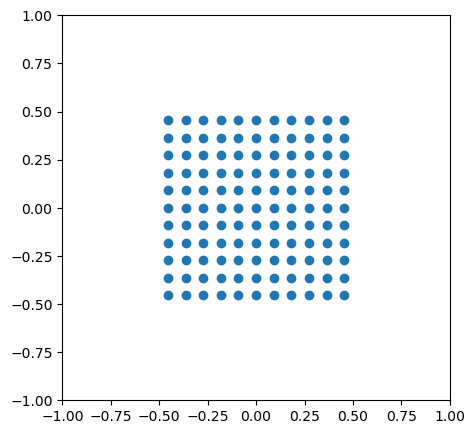

In [73]:
kpts = bbb[30][2]
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(kpts[:, 0], kpts[:, 1])
ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))
plt.show()

In [19]:
# sorted(band_structs, key=lambda x: x[0])

In [74]:
BS_obj = band_structs[4]
nkpt = len(np.unique(BS_obj[2][:,1]))
bands_tmp = BS_obj[3][:, :nkpt**2]

BS_obj[2][:nkpt**2]

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.14285714,  0.        ,  0.        ],
       [ 0.28571429,  0.        ,  0.        ],
       [ 0.42857143,  0.        ,  0.        ],
       [ 0.        ,  0.14285714,  0.        ],
       [ 0.14285714,  0.14285714,  0.        ],
       [ 0.28571429,  0.14285714,  0.        ],
       [ 0.42857143,  0.14285714,  0.        ],
       [-0.42857143,  0.14285714,  0.        ],
       [-0.28571429,  0.14285714,  0.        ],
       [-0.14285714,  0.14285714,  0.        ],
       [ 0.        ,  0.28571429,  0.        ],
       [ 0.14285714,  0.28571429,  0.        ],
       [ 0.28571429,  0.28571429,  0.        ],
       [ 0.42857143,  0.28571429,  0.        ],
       [-0.42857143,  0.28571429,  0.        ],
       [-0.28571429,  0.28571429,  0.        ],
       [-0.14285714,  0.28571429,  0.        ],
       [ 0.        ,  0.42857143,  0.        ],
       [ 0.14285714,  0.42857143,  0.        ],
       [ 0.28571429,  0.42857143,  0.   

In [74]:

interesting_BSs = []
for BS_obj in bbb:
    nkpt = BS_obj[0][0]
    bands_tmp = BS_obj[3]
    # print(bands_tmp.shape)

    bands_interest = [ [BS_obj[2], band] for band in bands_tmp if np.max(band)- np.min(band) > 0.5]
    # print(bands_interest.shape)
    interesting_BSs.extend( bands_interest)
len(interesting_BSs)

15533

In [114]:
len(interesting_BSs)

15533

In [75]:

# def refine_BS(kpts,  BS):
#     # kx = np.unique(kpts[:,0])
#     # ky = np.unique(kpts[:,0])
#     # print(kpts,  BS)
#     interp = LinearNDInterpolator(kpts, BS)

#     kx10 = np.linspace(-0.5, 0.5, 10)
#     ky10 = np.linspace(-0.5, 0.5, 10)
#     kX10, kY10 = np.meshgrid(kx10, ky10, indexing='ij')

#     BS = interp((kX10, kY10))
#     return BS
    

# refinedBSs = [refine_BS(kpts,  BS) for kpts, BS in interesting_BSs[:]]

In [76]:
# kpts = interesting_BSs[0][0]
# bnds = interesting_BSs[0][1]
# sorted_indices = np.lexsort((kpts[:, 0], kpts[:, 1]))
# kpts = kpts[sorted_indices]
# bnds = bnds[sorted_indices]
# kpts

In [115]:

def refine_BS(kpts,  BS):
    # kx = kpts
    # ky = kpts

    sorted_indices = np.lexsort((kpts[:, 0], kpts[:, 1]))
    kpts = kpts[sorted_indices]
    BS = BS[sorted_indices]

    kx = np.unique(kpts[:,0])
    ky = np.unique(kpts[:,1])
    # print(kpts,  BS)
    try:
        interp = RegularGridInterpolator((kx, ky), BS.reshape(len(kx), len(ky)),
                                    bounds_error=False, fill_value=None)

        kx10 = np.linspace(-0.5, 0.5, 10)
        ky10 = np.linspace(-0.5, 0.5, 10)
        kX10, kY10 = np.meshgrid(kx10, ky10, indexing='ij')

        BS = interp((kX10, kY10))
        return BS
    except Exception as e:
        pass

refinedBSs = [refine_BS(kpts,  BS) for kpts, BS in interesting_BSs[:]]

In [116]:
len(refinedBSs)

15533

In [118]:
with HDFArchive('bs15533.h5') as ar:
    ar['data'] = refinedBSs
    ar['kx'] = np.linspace(-0.5, 0.5, 10)
    ar['ky'] = np.linspace(-0.5, 0.5, 10)

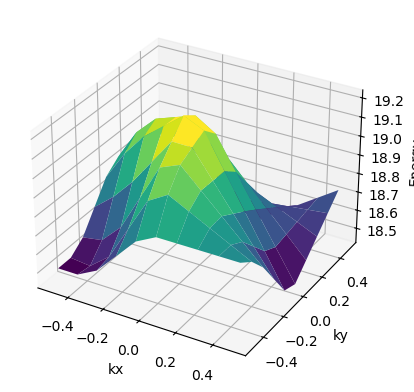

In [82]:
i = 56

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

kx = np.linspace(-0.5, 0.5, 10)
ky = np.linspace(-0.5, 0.5, 10)
kx, ky = np.meshgrid(kx, ky)
kpoints = np.array([kx.flatten(), ky.flatten()]).T

# refinedBSs
# bb = np.reshape(band, (6, 6))
# Plot the surface
ax.plot_surface(kx, ky, refinedBSs[i], cmap='viridis')

# Add labels
ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('Energy')
# ax.set_zlim((-4, 2))
# Show the plot
plt.show()

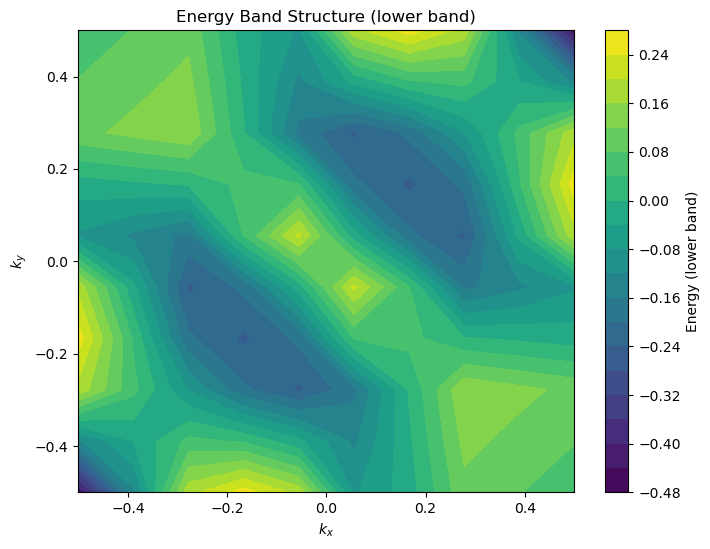

In [113]:
i=98
kx = np.linspace(-0.5, 0.5, 10)
ky = np.linspace(-0.5, 0.5, 10)
kx, ky = np.meshgrid(kx, ky)
kpoints = np.array([kx.flatten(), ky.flatten()]).T


plt.figure(figsize=(8, 6))
plt.contourf(kx, ky, refinedBSs[i], levels=20, cmap='viridis')
plt.colorbar(label='Energy (lower band)')
plt.title('Energy Band Structure (lower band)')
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.show()

# Other

In [ ]:
interesting_BSs

In [29]:
interesting_BSs[0][1]

array([-2.3255, -2.2712, -2.1369, -1.9817, -1.9295, -2.0976, -2.2766,
       -2.1966, -2.0484, -1.9333, -1.8939, -2.032 , -1.9139, -1.9355,
       -2.0372, -2.184 , -2.1738, -2.1504, -2.049 , -2.0168, -1.924 ,
       -1.865 , -1.8726, -1.9181, -1.9852, -2.0427, -2.0278, -2.038 ,
       -1.9948, -2.0462, -1.9983, -1.9176, -1.8806, -1.8913, -1.9168,
       -1.9413, -1.9028, -1.9504, -1.9894, -2.0172, -2.0207, -1.9739,
       -1.8868, -1.8322, -1.8446, -1.9027, -1.9129, -1.8529, -1.9171,
       -1.9809, -2.0932, -2.0263, -1.9395, -1.8381, -1.8335, -2.0365,
       -2.3246, -2.2775, -2.1454, -1.9868, -1.9375, -2.1005, -2.0928,
       -1.9223, -1.9671, -2.1241, -2.2629, -2.2698, -2.1814, -2.0414,
       -1.944 , -1.9047, -2.0372, -1.9121, -1.8981, -2.0256, -2.1721,
       -2.1868, -2.1427, -2.0422, -2.0021, -1.9209, -1.8422, -1.8335,
       -1.8682, -1.9589, -2.0375, -2.0388, -2.0387, -1.9889, -2.0128,
       -1.9878, -1.9184, -1.8449, -1.8504, -1.9052, -1.958 , -1.9447,
       -1.9673, -1.9

In [123]:
kpt = np.array([kpt.frac_coords for kpt in band_structs[1][2].kpoints ])
dim1 = np.unique(kpt[:,0])
dim2 = np.unique(kpt[:,1])
dim3 = np.unique(kpt[:,2])
print(len(dim1), dim1 )
print(len(dim2), dim2 )
print(len(dim3), dim3 )

6 [0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545]
6 [0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545]
4 [0.         0.16666667 0.33333333 0.5       ]


(178, 36)
(14, 36)


In [38]:
kpt = np.array([kpt.frac_coords for kpt in bandstructure.kpoints ])
dim1 = np.unique(kpt[:,0])
dim2 = np.unique(kpt[:,1])
dim3 = np.unique(kpt[:,2])
print(len(dim1), dim1 )
print(len(dim2), dim2 )
print(len(dim3), dim3 )

9 [0.     0.0625 0.125  0.1875 0.25   0.3125 0.375  0.4375 0.5   ]
4 [0.         0.16666667 0.33333333 0.5       ]
3 [0.  0.2 0.4]


In [89]:
from mpl_toolkits.mplot3d import Axes3D


In [98]:
max_limit = 1000
with MPRester(api_key=apikey) as mpr:
    for item in tqdm(D2matdata['data'][:max_limit]):
        mat_id = item['identifier']
        material = item['formula']

        try:
            bandstructure = mpr.get_bandstructure_by_material_id(mat_id, line_mode=False)
            kpt = np.array([kpt.frac_coords for kpt in bandstructure.kpoints ])
            dim1 = np.unique(kpt[:,0])
            dim2 = np.unique(kpt[:,1])
            dim3 = np.unique(kpt[:,2])
            z0 = np.min(np.abs(dim3))
            
            # print(len(dim1), dim1 )
            # print(len(dim2), dim2 )
            # print(len(dim3), dim3 )
            # print(np.array(list(bandstructure.bands.values()))[0].shape)
            
            if  len(kpt[kpt[:, 2] == z0]) == len(dim1)*len(dim2) and np.min(kpt[:,0]) < -0.4 \
                    and np.max(kpt[:,0]) > 0.4 and np.min(kpt[:,1]) < -0.4 and np.max(kpt[:,1]) > 0.4:
                print(material, mat_id)
                break
        except Exception as e:
            print(f"Error retrieving band structure for {mat_id}: {e}")
    

  2%|▏         | 22/1000 [00:34<25:31,  1.57s/it]

Sn3Pd mp-1371


In [99]:
with MPRester(api_key=apikey) as mpr:
    bandstructure = mpr.get_bandstructure_by_material_id('mp-1371', line_mode=False)

kpt = np.array([kpt.frac_coords for kpt in bandstructure.kpoints ])
dim1 = np.unique(kpt[:,0])
dim2 = np.unique(kpt[:,1])
dim3 = np.unique(kpt[:,2])
print(len(dim1), dim1 )
print(len(dim2), dim2 )
print(len(dim3), dim3 )

Retrieving ElectronicStructureDoc documents: 100%|██████████| 1/1 [00:00<00:00, 9198.04it/s]


6 [-0.41666667 -0.25       -0.08333333  0.08333333  0.25        0.41666667]
6 [-0.41666667 -0.25       -0.08333333  0.08333333  0.25        0.41666667]
4 [0.0625 0.1875 0.3125 0.4375]


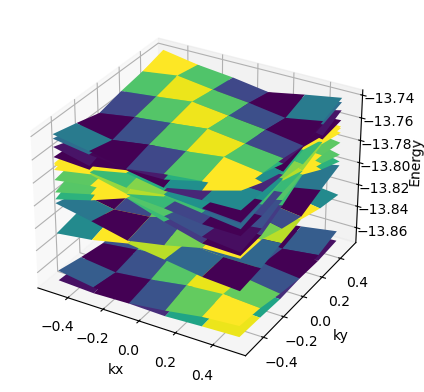

In [101]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

kx = np.linspace(-0.5, 0.5, 6)
ky = np.linspace(-0.5, 0.5, 6)
kx, ky = np.meshgrid(kx, ky)
kpoints = np.array([kx.flatten(), ky.flatten()]).T

# bb = np.reshape(band, (6, 6))

for i in range(14):
    band = list(bandstructure.bands.values())[0][i][:36]
    # band =bands_refined[i]
    bb = np.reshape(band, (6, 6))
# Plot the surface
    ax.plot_surface(kx, ky, bb, cmap='viridis')

# Add labels
ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('Energy')
# ax.set_zlim((-4, 2))
# Show the plot
plt.show()

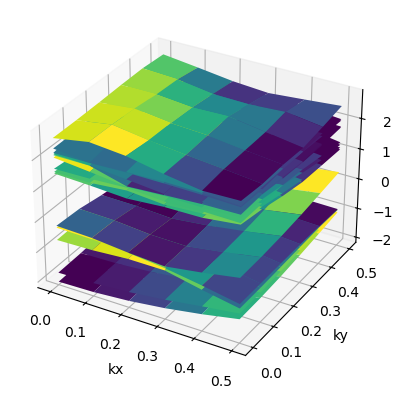

In [129]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for i in range(14):
    band = list(bandstructure.bands.values())[0][i][:36]
    # band =bands_refined[i]
    bb = np.reshape(band, (6, 6))
# Plot the surface
    ax.plot_surface(kx, ky, bb, cmap='viridis')

# Add labels
ax.set_xlabel('kx')
ax.set_ylabel('ky')
ax.set_zlabel('Energy')
# ax.set_zlim((-4, 2))
# Show the plot
plt.show()

In [83]:
band = list(bandstructure.bands.values())[0][80][:36]

In [46]:
kx = np.linspace(0, 0.5, 6)
ky = np.linspace(0, 0.5, 6)
kx, ky = np.meshgrid(kx, ky)
kpoints = np.array([kx.flatten(), ky.flatten()]).T

# bb = np.reshape(band, (6, 6))

In [47]:
kx

array([[0. , 0.1, 0.2, 0.3, 0.4, 0.5],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5],
       [0. , 0.1, 0.2, 0.3, 0.4, 0.5]])

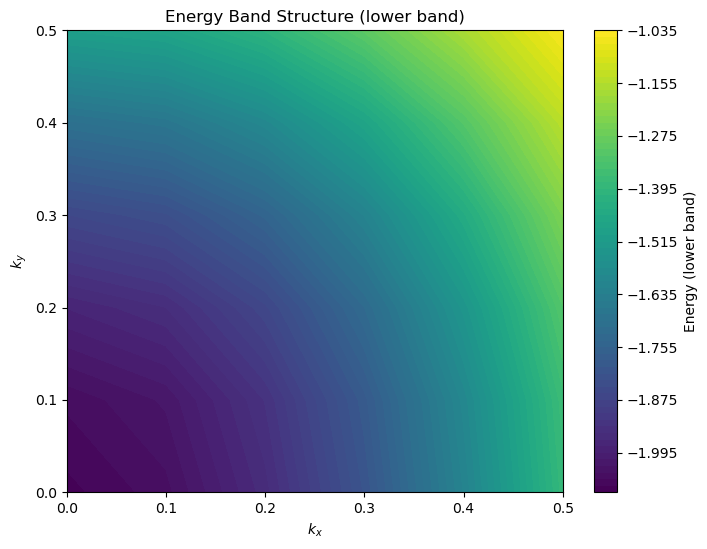

In [88]:
plt.figure(figsize=(8, 6))
plt.contourf(kx, ky, bb, levels=100, cmap='viridis')
plt.colorbar(label='Energy (lower band)')
plt.title('Energy Band Structure (lower band)')
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.show()

In [87]:
bb = np.reshape(band, (6, 6))
bb

array([[-2.0758, -2.0459, -1.9572, -1.813 , -1.6194, -1.3884],
       [-2.0515, -2.0219, -1.9338, -1.7909, -1.5992, -1.3713],
       [-1.9793, -1.9503, -1.8644, -1.7252, -1.5398, -1.3215],
       [-1.8609, -1.833 , -1.7508, -1.6185, -1.4442, -1.2437],
       [-1.6993, -1.6732, -1.5967, -1.4749, -1.3184, -1.1466],
       [-1.499 , -1.4756, -1.4073, -1.3013, -1.172 , -1.0445]])

In [20]:
import plotly.graph_objects as go
import numpy as np


In [25]:
def plot_conf(conf):
    Sx = conf[:,0].flatten()
    Sy = conf[:,1].flatten()
    Sz = conf[:,2].flatten()

    fig = go.Figure()
    # fig.update_xaxes(range=[-1, 1])
    # fig.update_yaxes(range=[-1, 1])
    # fig.update_zaxes(range=[-1, 1])
    fig.add_trace(
        go.Scatter3d(x=Sx, y=Sy, z=Sz,
                    mode='markers',
                    #  size=np.ones(len(SSS))*1
                    marker=dict(
                                size=3.0,
                                # color=z,                # set color to an array/list of desired values
                                # colorscale='Viridis',   # choose a colorscale
                                opacity=0.7
                            )
                    )
        )
    fig.update_layout(scene = dict(
                        xaxis = dict(nticks=4, range=[-1,1],),
                        yaxis = dict(nticks=4, range=[-1,1],),
                        zaxis = dict(nticks=4, range=[-1,1],),),
                    width=700,
                    legend_orientation="h",
                    legend=dict(x=.5, xanchor="center"),
                    hovermode="x",
                    margin=dict(l=0, r=0, t=0, b=0))


    fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")
    fig.show()

kkp = np.array([kpt.frac_coords for kpt in bandstructure.kpoints])
plot_conf(kkp)

In [22]:
kkp

array([[0.        , 0.        , 0.        ],
       [0.09090909, 0.        , 0.        ],
       [0.18181818, 0.        , 0.        ],
       [0.27272727, 0.        , 0.        ],
       [0.36363636, 0.        , 0.        ],
       [0.45454545, 0.        , 0.        ],
       [0.        , 0.09090909, 0.        ],
       [0.09090909, 0.09090909, 0.        ],
       [0.18181818, 0.09090909, 0.        ],
       [0.27272727, 0.09090909, 0.        ],
       [0.36363636, 0.09090909, 0.        ],
       [0.45454545, 0.09090909, 0.        ],
       [0.        , 0.18181818, 0.        ],
       [0.09090909, 0.18181818, 0.        ],
       [0.18181818, 0.18181818, 0.        ],
       [0.27272727, 0.18181818, 0.        ],
       [0.36363636, 0.18181818, 0.        ],
       [0.45454545, 0.18181818, 0.        ],
       [0.        , 0.27272727, 0.        ],
       [0.09090909, 0.27272727, 0.        ],
       [0.18181818, 0.27272727, 0.        ],
       [0.27272727, 0.27272727, 0.        ],
       [0.

In [44]:
kline = [ [ind ,kpt.frac_coords] for ind, kpt in enumerate(bandstructure.kpoints) if kpt.frac_coords[1] == 0 and kpt.frac_coords[2] == 0.125 ]
kline

[[64, array([0.   , 0.   , 0.125])],
 [65, array([0.06666667, 0.        , 0.125     ])],
 [66, array([0.13333333, 0.        , 0.125     ])],
 [67, array([0.2  , 0.   , 0.125])],
 [68, array([0.26666667, 0.        , 0.125     ])],
 [69, array([0.33333333, 0.        , 0.125     ])],
 [70, array([0.4  , 0.   , 0.125])],
 [71, array([0.46666667, 0.        , 0.125     ])],
 [72, array([-0.46666667,  0.        ,  0.125     ])],
 [73, array([-0.4  ,  0.   ,  0.125])],
 [74, array([-0.33333333,  0.        ,  0.125     ])],
 [75, array([-0.26666667,  0.        ,  0.125     ])],
 [76, array([-0.2  ,  0.   ,  0.125])],
 [77, array([-0.13333333,  0.        ,  0.125     ])],
 [78, array([-0.06666667,  0.        ,  0.125     ])]]

In [45]:
inds  = [kk[0] for kk in kline] 
kpts  = [kk[1] for kk in kline] 
kpts = np.array(kpts)[:, 0]
kpts

array([ 0.        ,  0.06666667,  0.13333333,  0.2       ,  0.26666667,
        0.33333333,  0.4       ,  0.46666667, -0.46666667, -0.4       ,
       -0.33333333, -0.26666667, -0.2       , -0.13333333, -0.06666667])

In [25]:
np.array(kline)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (8, 2) + inhomogeneous part.

In [29]:
list(bandstructure.bands.values())[0][15][inds]

array([-5.0251, -5.0659, -5.157 , -5.2596, -5.3258, -5.3164, -5.3057,
       -5.2977])

In [56]:
# band = list(bandstructure.bands.values())[0][15] - bandstructure.efermi
band = list(bandstructure.bands.values())[0][29][inds]
band

array([2.6742, 2.7984, 3.065 , 3.45  , 3.9229, 4.4433, 4.9452, 5.264 ,
       5.1279, 4.6822, 4.1587, 3.6527, 3.2175, 2.8921, 2.7056])

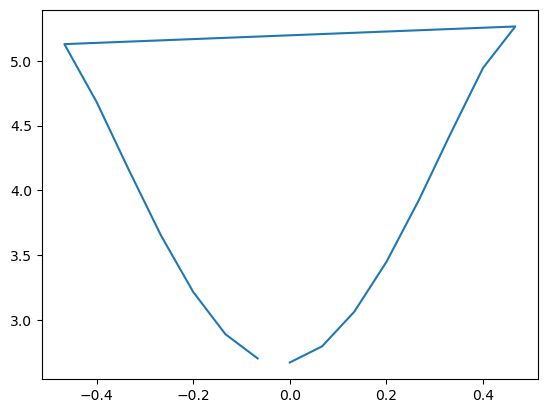

In [57]:
# random_band = generate(model)
# ks = list(np.linspace(-torch.pi, torch.pi, 1000 ))
# p_eval = np.polyval(poly_band.T, ks)
plt.plot(kpts, band)
# plt.ylim((-500, 200))
plt.show()

In [11]:
kkp

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.1010767 ,  0.        ,  0.0316198 ],
       [ 0.20215339,  0.        ,  0.06323959],
       ...,
       [-0.60646019,  0.60646019,  0.47429695],
       [ 0.70753689,  0.70753689,  0.91697411],
       [-0.70753689,  0.70753689,  0.47429695]])

In [13]:
bandstructure.kpoints

<bound method BandStructure.get_sym_eq_kpoints of <pymatgen.electronic_structure.bandstructure.BandStructureSymmLine object at 0x7374912a8c80>>

In [ ]:
for element in bandstructure.bands:
    for i in range(bandstructure.nb_bands):
        band = list(bandstructure.bands.values())[0][i] - bandstructure.efermi
        krange = np.linspace(-np.pi, np.pi, len(band))
        poly_coeffs = np.polyfit(krange, band, 20)
        print(band)
    break